# Recon ML System

## Importing libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import joblib
from sklearn.preprocessing import LabelEncoder

from functions_ml import *
model_repo = ".\\Recon_model\\"
file_path = '.\Files\\Recon\\'

## Preprocessing data for binary classification (Recon or Benign)

### Import basic datasets

In [2]:
train_sets, test_sets = get_train_and_test_files()
print(len(train_sets), len(test_sets))

X_columns = x_columns(read_csv_file(train_sets[0]))
y_column = 'label'

135 34


### Scaling

In [3]:
scaler = get_or_define_and_save_scaler(model_repo, train_sets, X_columns)

### Dictionnary for spliting data

In [4]:
dict_3_classes = {}
dict_3_classes['Recon-PingSweep'] = 'Recon'
dict_3_classes['Recon-OSScan'] = 'Recon'
dict_3_classes['Recon-PortScan'] = 'Recon'
dict_3_classes['VulnerabilityScan'] = 'Recon'
dict_3_classes['Recon-HostDiscovery'] = 'Recon'

dict_3_classes['BenignTraffic'] = 'Benign'

dict_3_classes['DDoS-RSTFINFlood'] = 'Other'
dict_3_classes['DDoS-PSHACK_Flood'] = 'Other'
dict_3_classes['DDoS-SYN_Flood'] = 'Other'
dict_3_classes['DDoS-UDP_Flood'] = 'Other'
dict_3_classes['DDoS-TCP_Flood'] = 'Other'
dict_3_classes['DDoS-ICMP_Flood'] = 'Other'
dict_3_classes['DDoS-SynonymousIP_Flood'] = 'Other'
dict_3_classes['DDoS-ACK_Fragmentation'] = 'Other'
dict_3_classes['DDoS-UDP_Fragmentation'] = 'Other'
dict_3_classes['DDoS-ICMP_Fragmentation'] = 'Other'
dict_3_classes['DDoS-SlowLoris'] = 'Other'
dict_3_classes['DDoS-HTTP_Flood'] = 'Other'
dict_3_classes['DoS-UDP_Flood'] = 'Other'
dict_3_classes['DoS-SYN_Flood'] = 'Other'
dict_3_classes['DoS-TCP_Flood'] = 'Other'
dict_3_classes['DoS-HTTP_Flood'] = 'Other'
dict_3_classes['Mirai-greeth_flood'] = 'Other'
dict_3_classes['Mirai-greip_flood'] = 'Other'
dict_3_classes['Mirai-udpplain'] = 'Other'
dict_3_classes['DNS_Spoofing'] = 'Other'
dict_3_classes['MITM-ArpSpoofing'] = 'Other'
dict_3_classes['BrowserHijacking'] = 'Other'
dict_3_classes['Backdoor_Malware'] = 'Other'
dict_3_classes['XSS'] = 'Other'
dict_3_classes['Uploading_Attack'] = 'Other'
dict_3_classes['SqlInjection'] = 'Other'
dict_3_classes['CommandInjection'] = 'Other'
dict_3_classes['DictionaryBruteForce'] = 'Other'

### Refactoring data

In [5]:
train_sets.extend(test_sets)
refactor_dataframe(train_sets, dict_3_classes, file_path, y_column)

100%|██████████| 168/168 [02:25<00:00,  1.16it/s]


### Counting number of samples per class

5


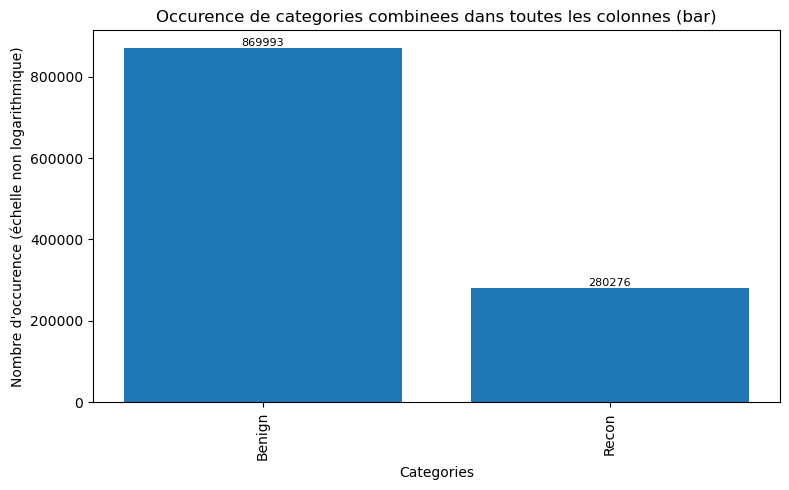

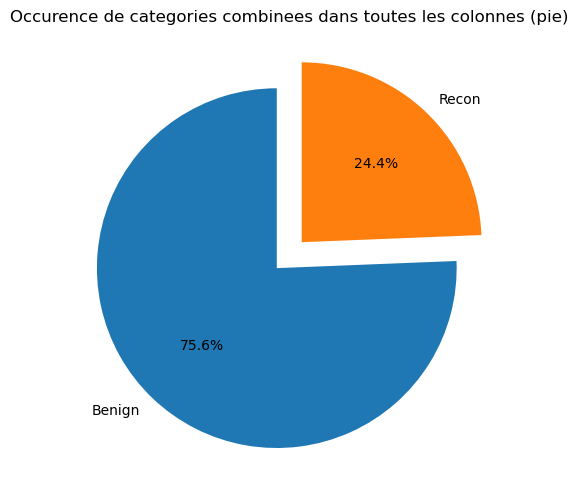

In [3]:
train_sets, test_sets = get_train_and_test_files(path_to_datasets=file_path)
print(len(train_sets) + len(test_sets))

plot_bar_chart(count_label(train_sets, file_path=file_path), 'Occurence de categories combinees dans toutes les colonnes (bar)', 'Categories', 'Nombre d\'occurence', 8, 5, model_repo, log_scale=False)
plot_pie_chart(count_label(train_sets, file_path=file_path), 'Occurence de categories combinees dans toutes les colonnes (pie)', 8, 5, model_repo)

## Define variables

In [4]:
performance_path = 'performance.csv'
file_path = '.\Files\\Recon\\'
model_path_binary = '.\\Recon_model\\Binary\\'
local_path = '.\\Recon_model\\'
model_path_all_classes = '.\\Recon_model\\All_classes\\'
after_build_csv = 'after_build_set_scaled.csv'

# Get path data
build_sets, after_build_sets = get_train_and_test_files(path_to_datasets=file_path)
print(len(build_sets) + len(after_build_sets))

# Get build datasets
build_nb = round(len(build_sets) * 0.8)
train_sets = build_sets[:build_nb]
# train_sets = train_sets[: round(len(train_sets) * 0.5)]
test_sets = build_sets[build_nb:]
# test_sets = test_sets[: round(len(test_sets) * 0.5)]

# Define different columns
X_columns = x_columns(read_csv_file(train_sets[0], path_to_datasets=file_path))
print(len(X_columns))
X_columns = X_columns[:-1]
y_column = 'label'
z_column = 'Binary'

5
47


## First model (Binary (Recon or Benigh))

### Building model

In [26]:
simpleModelsDef = [
    {
        "Name": "DT",
        "Model": DecisionTreeClassifier(random_state = 42)
    },
    {
        "Name": "RF",
        "Model": RandomForestClassifier(random_state = 42)
    },
    {
        "Name": "ET",
        "Model": ExtraTreesClassifier(random_state = 42)
    },
    {
        "Name": "XGB",
        "Model": XGBClassifier(random_state = 42)
    },
    {
        "Name": "Cat",
        "Model": CatBoostClassifier(random_state = 42, verbose = 0)
    },
    {
        "Name": "LIGHT",
        "Model": LGBMClassifier(random_state = 42, verbose = 0)
    },
    {
        "Name": "GBoost",
        "Model": GradientBoostingClassifier(random_state = 42)
    },
    {
        "Name": "Adaboost",
        "Model": AdaBoostClassifier(random_state = 42)
    },
    {
        "Name": "MLP",
        "Model": MLPClassifier(hidden_layer_sizes = (100,20), max_iter = 300, activation = 'relu', solver = 'adam', random_state = 42)
    },
]

  0%|          | 0/9 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:00<00:00, 21.46it/s]


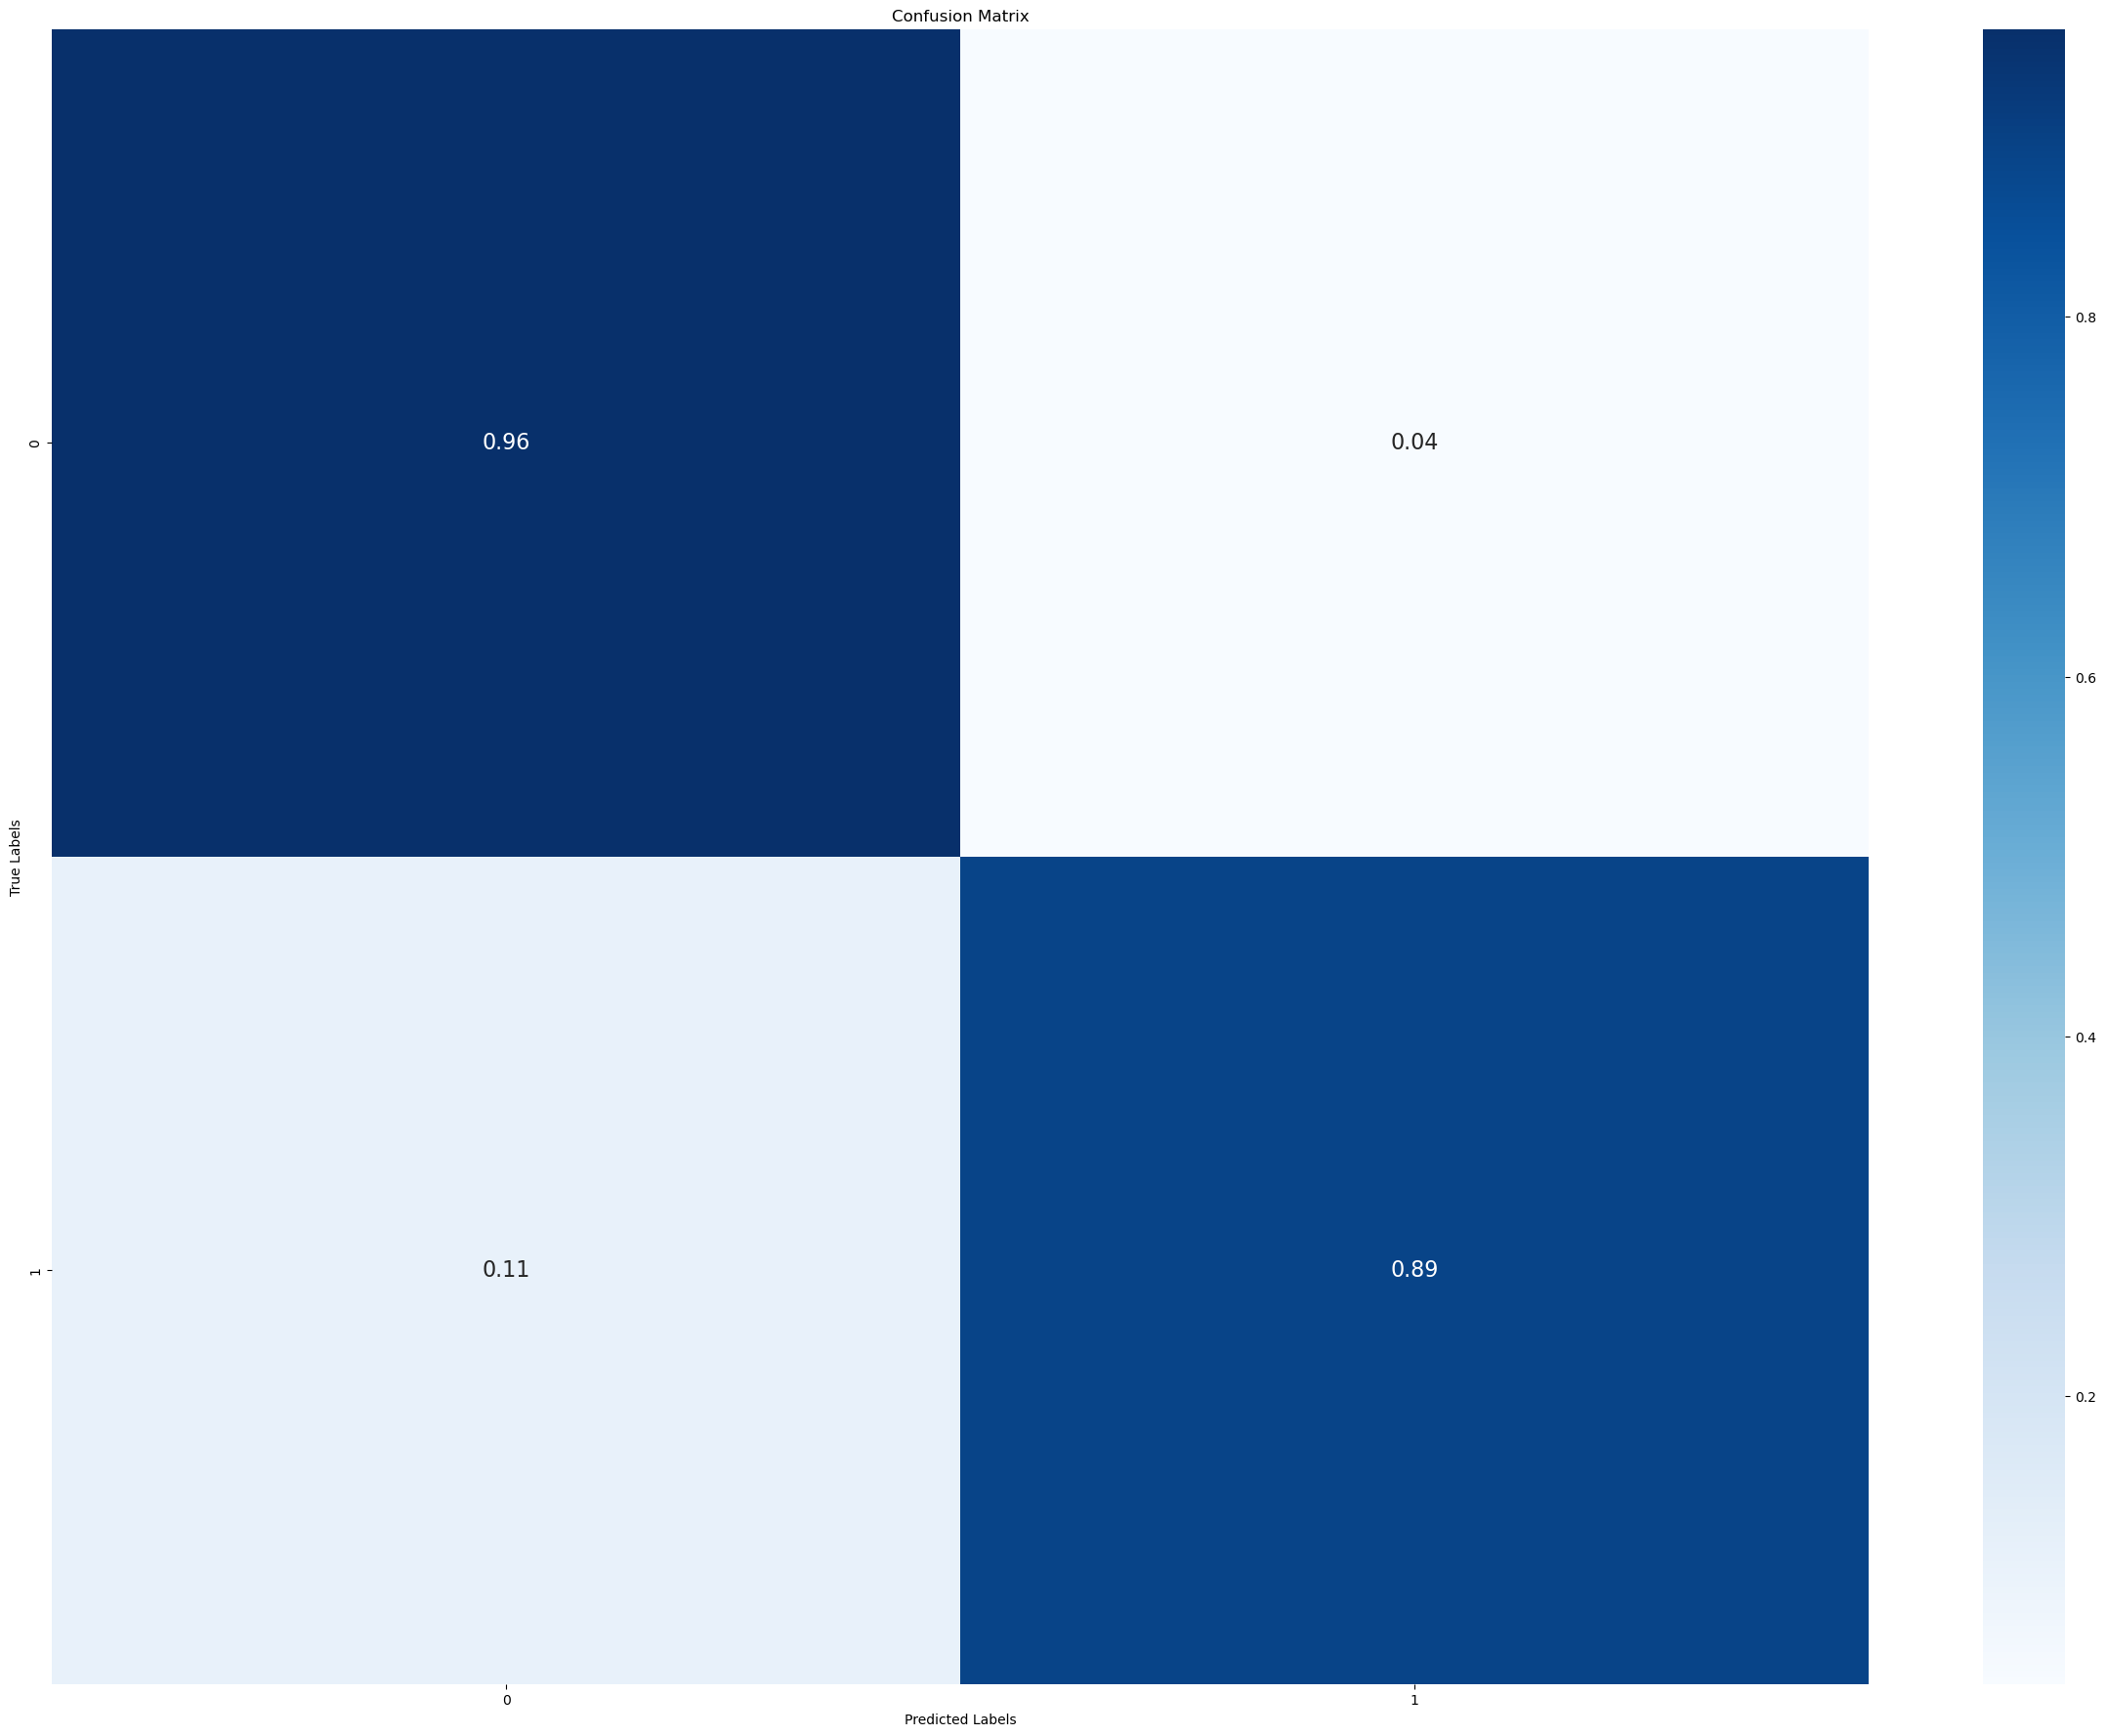

100%|██████████| 2/2 [00:00<00:00, 22.29it/s]


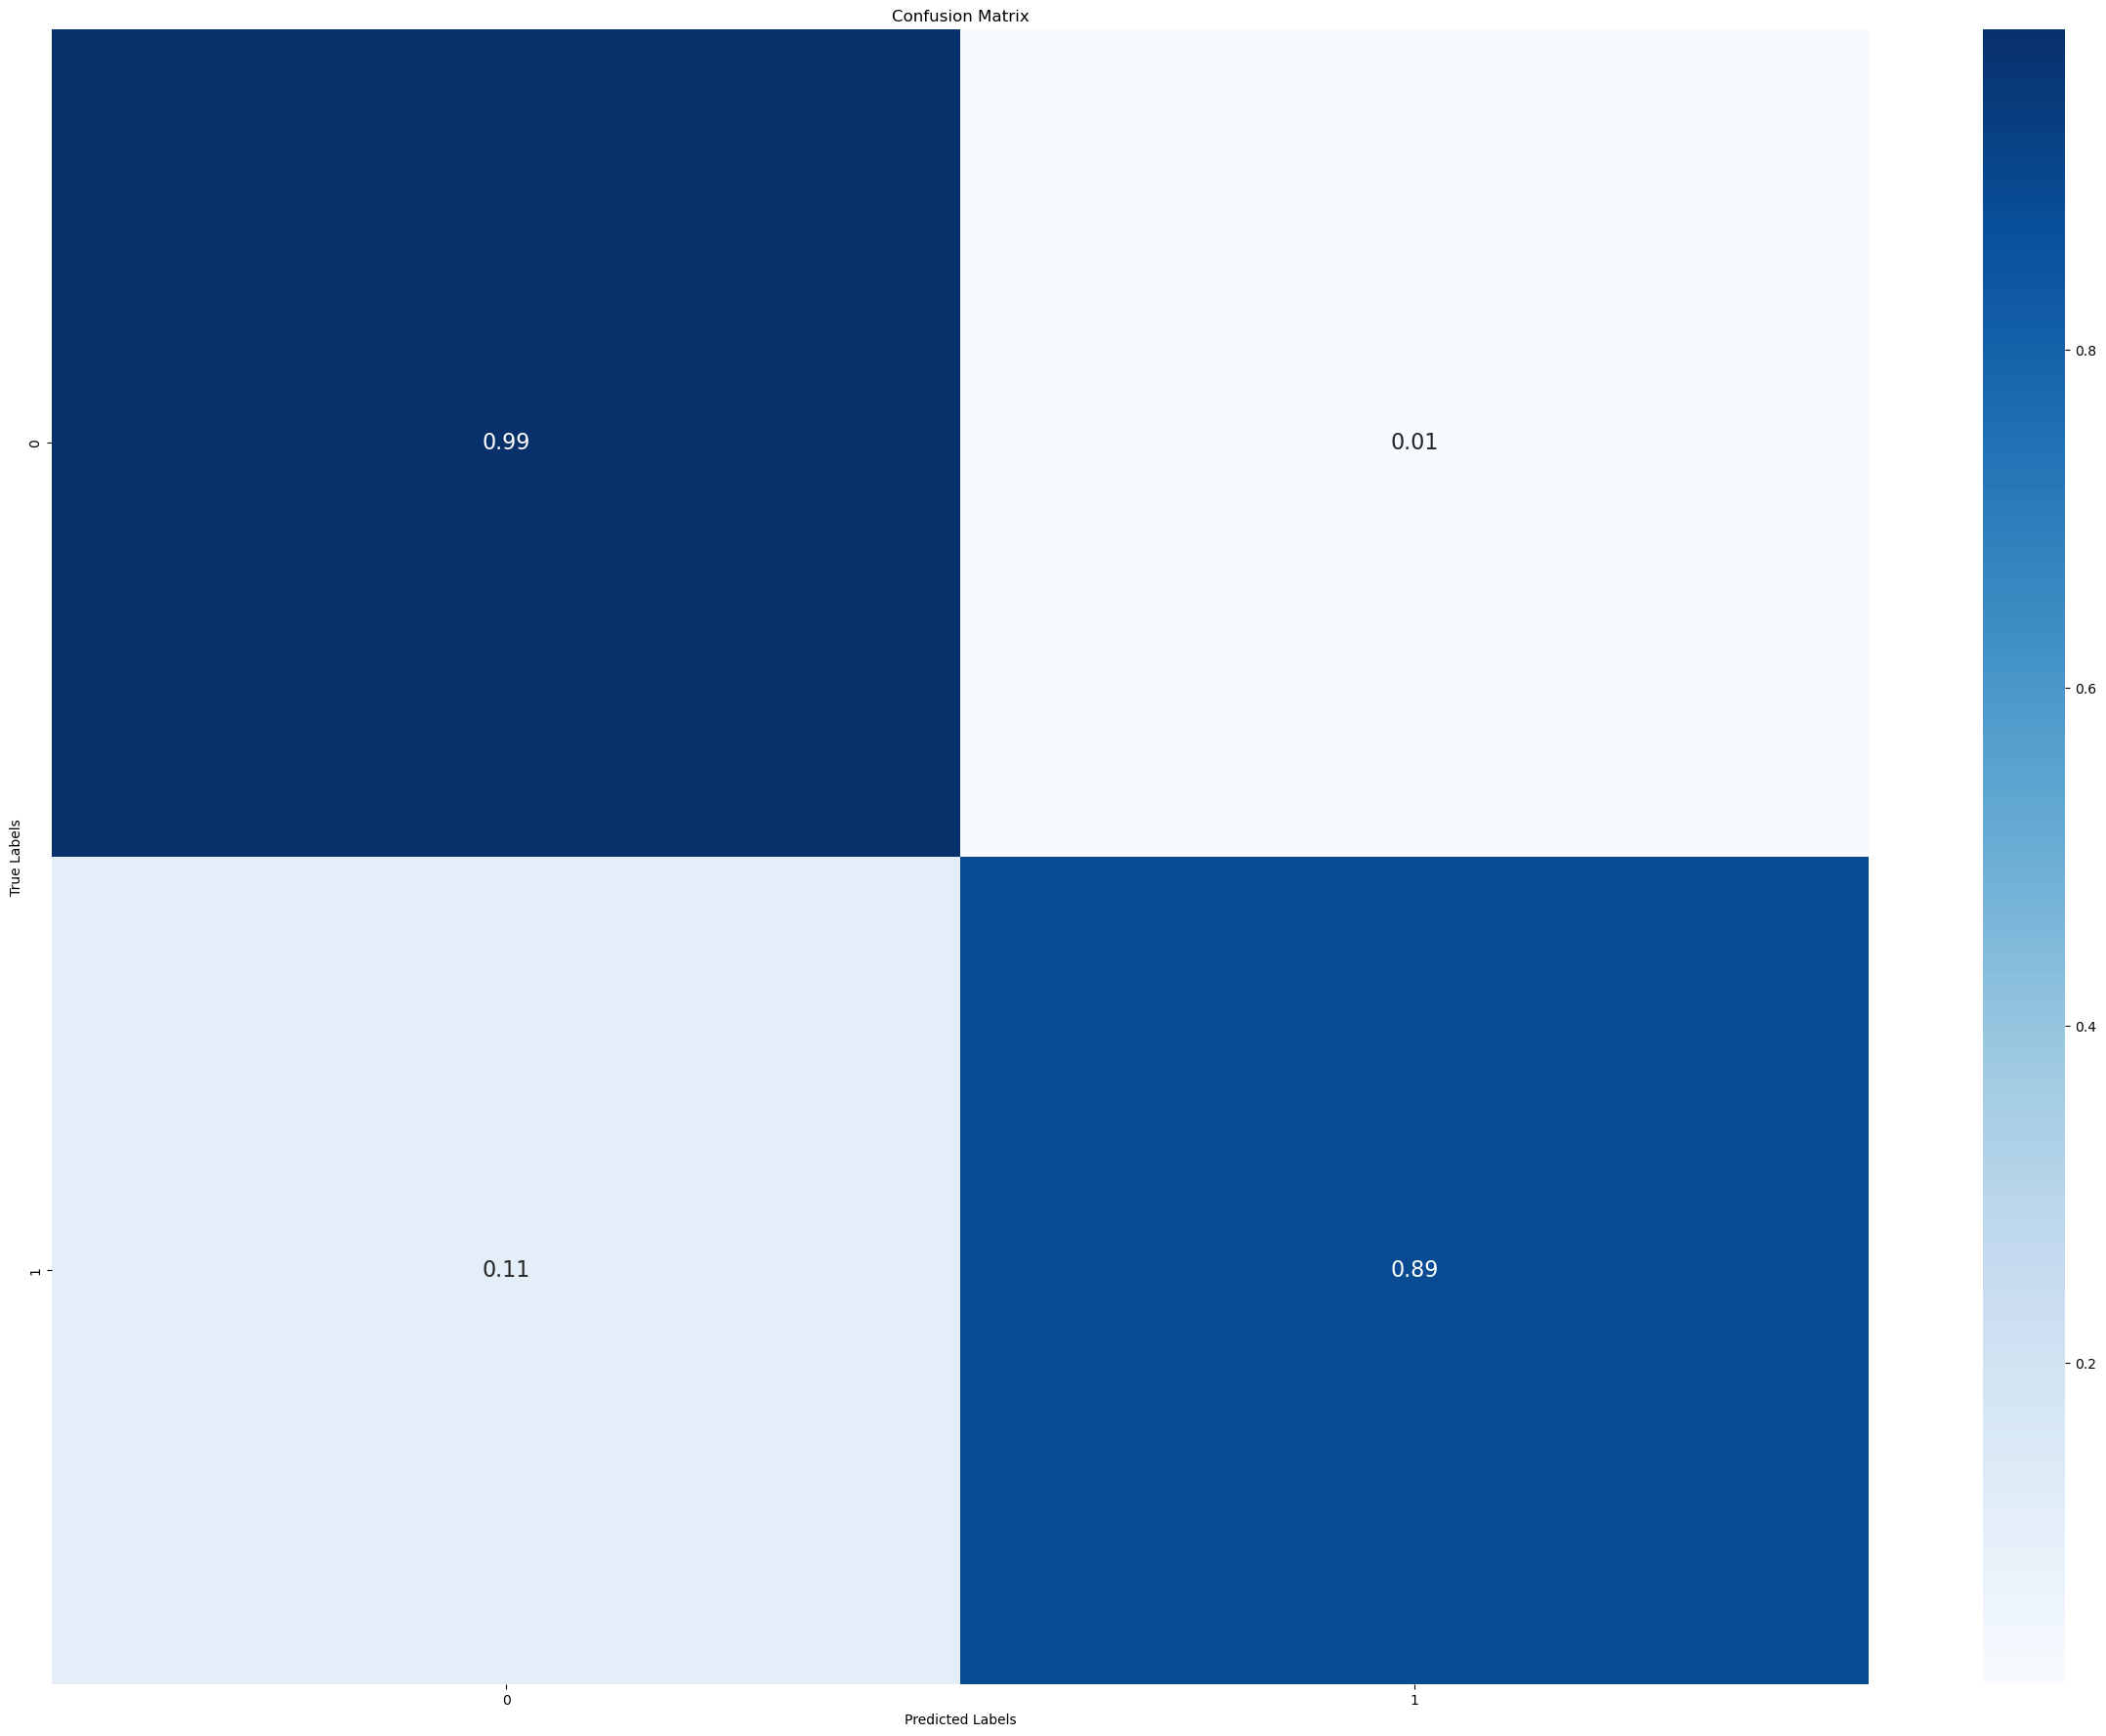

100%|██████████| 2/2 [00:00<00:00, 21.56it/s]


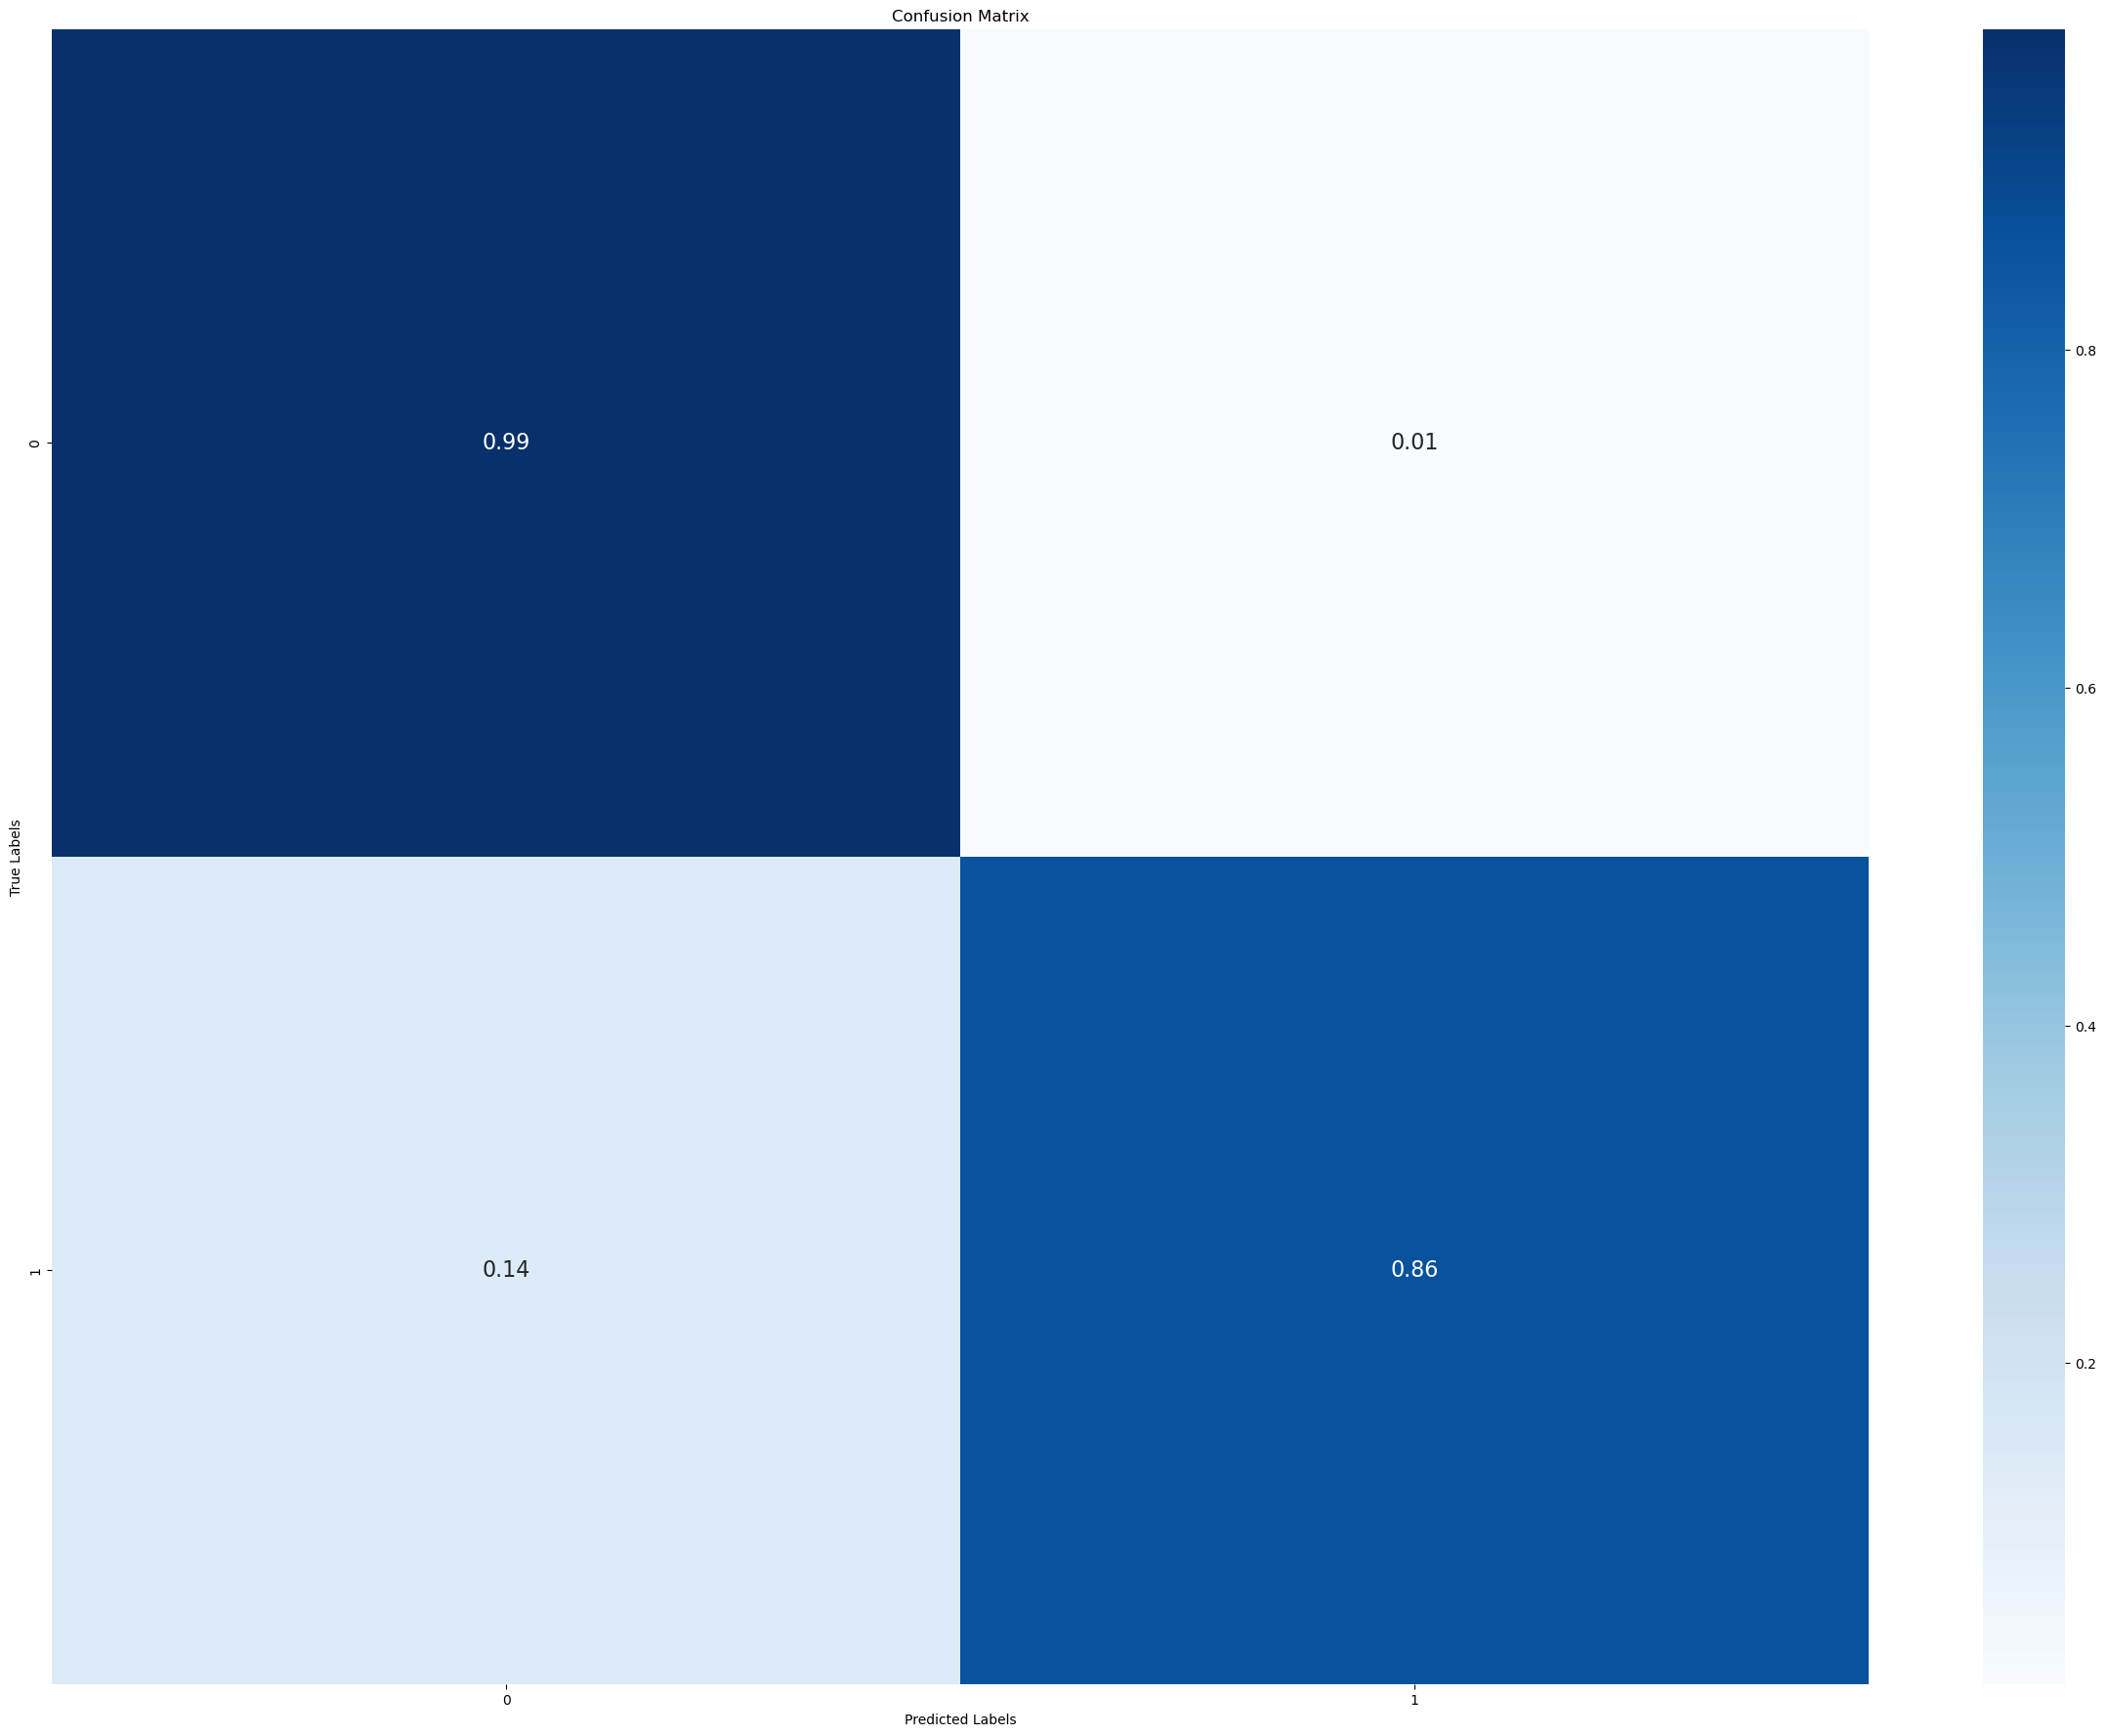

100%|██████████| 2/2 [00:00<00:00, 16.50it/s]


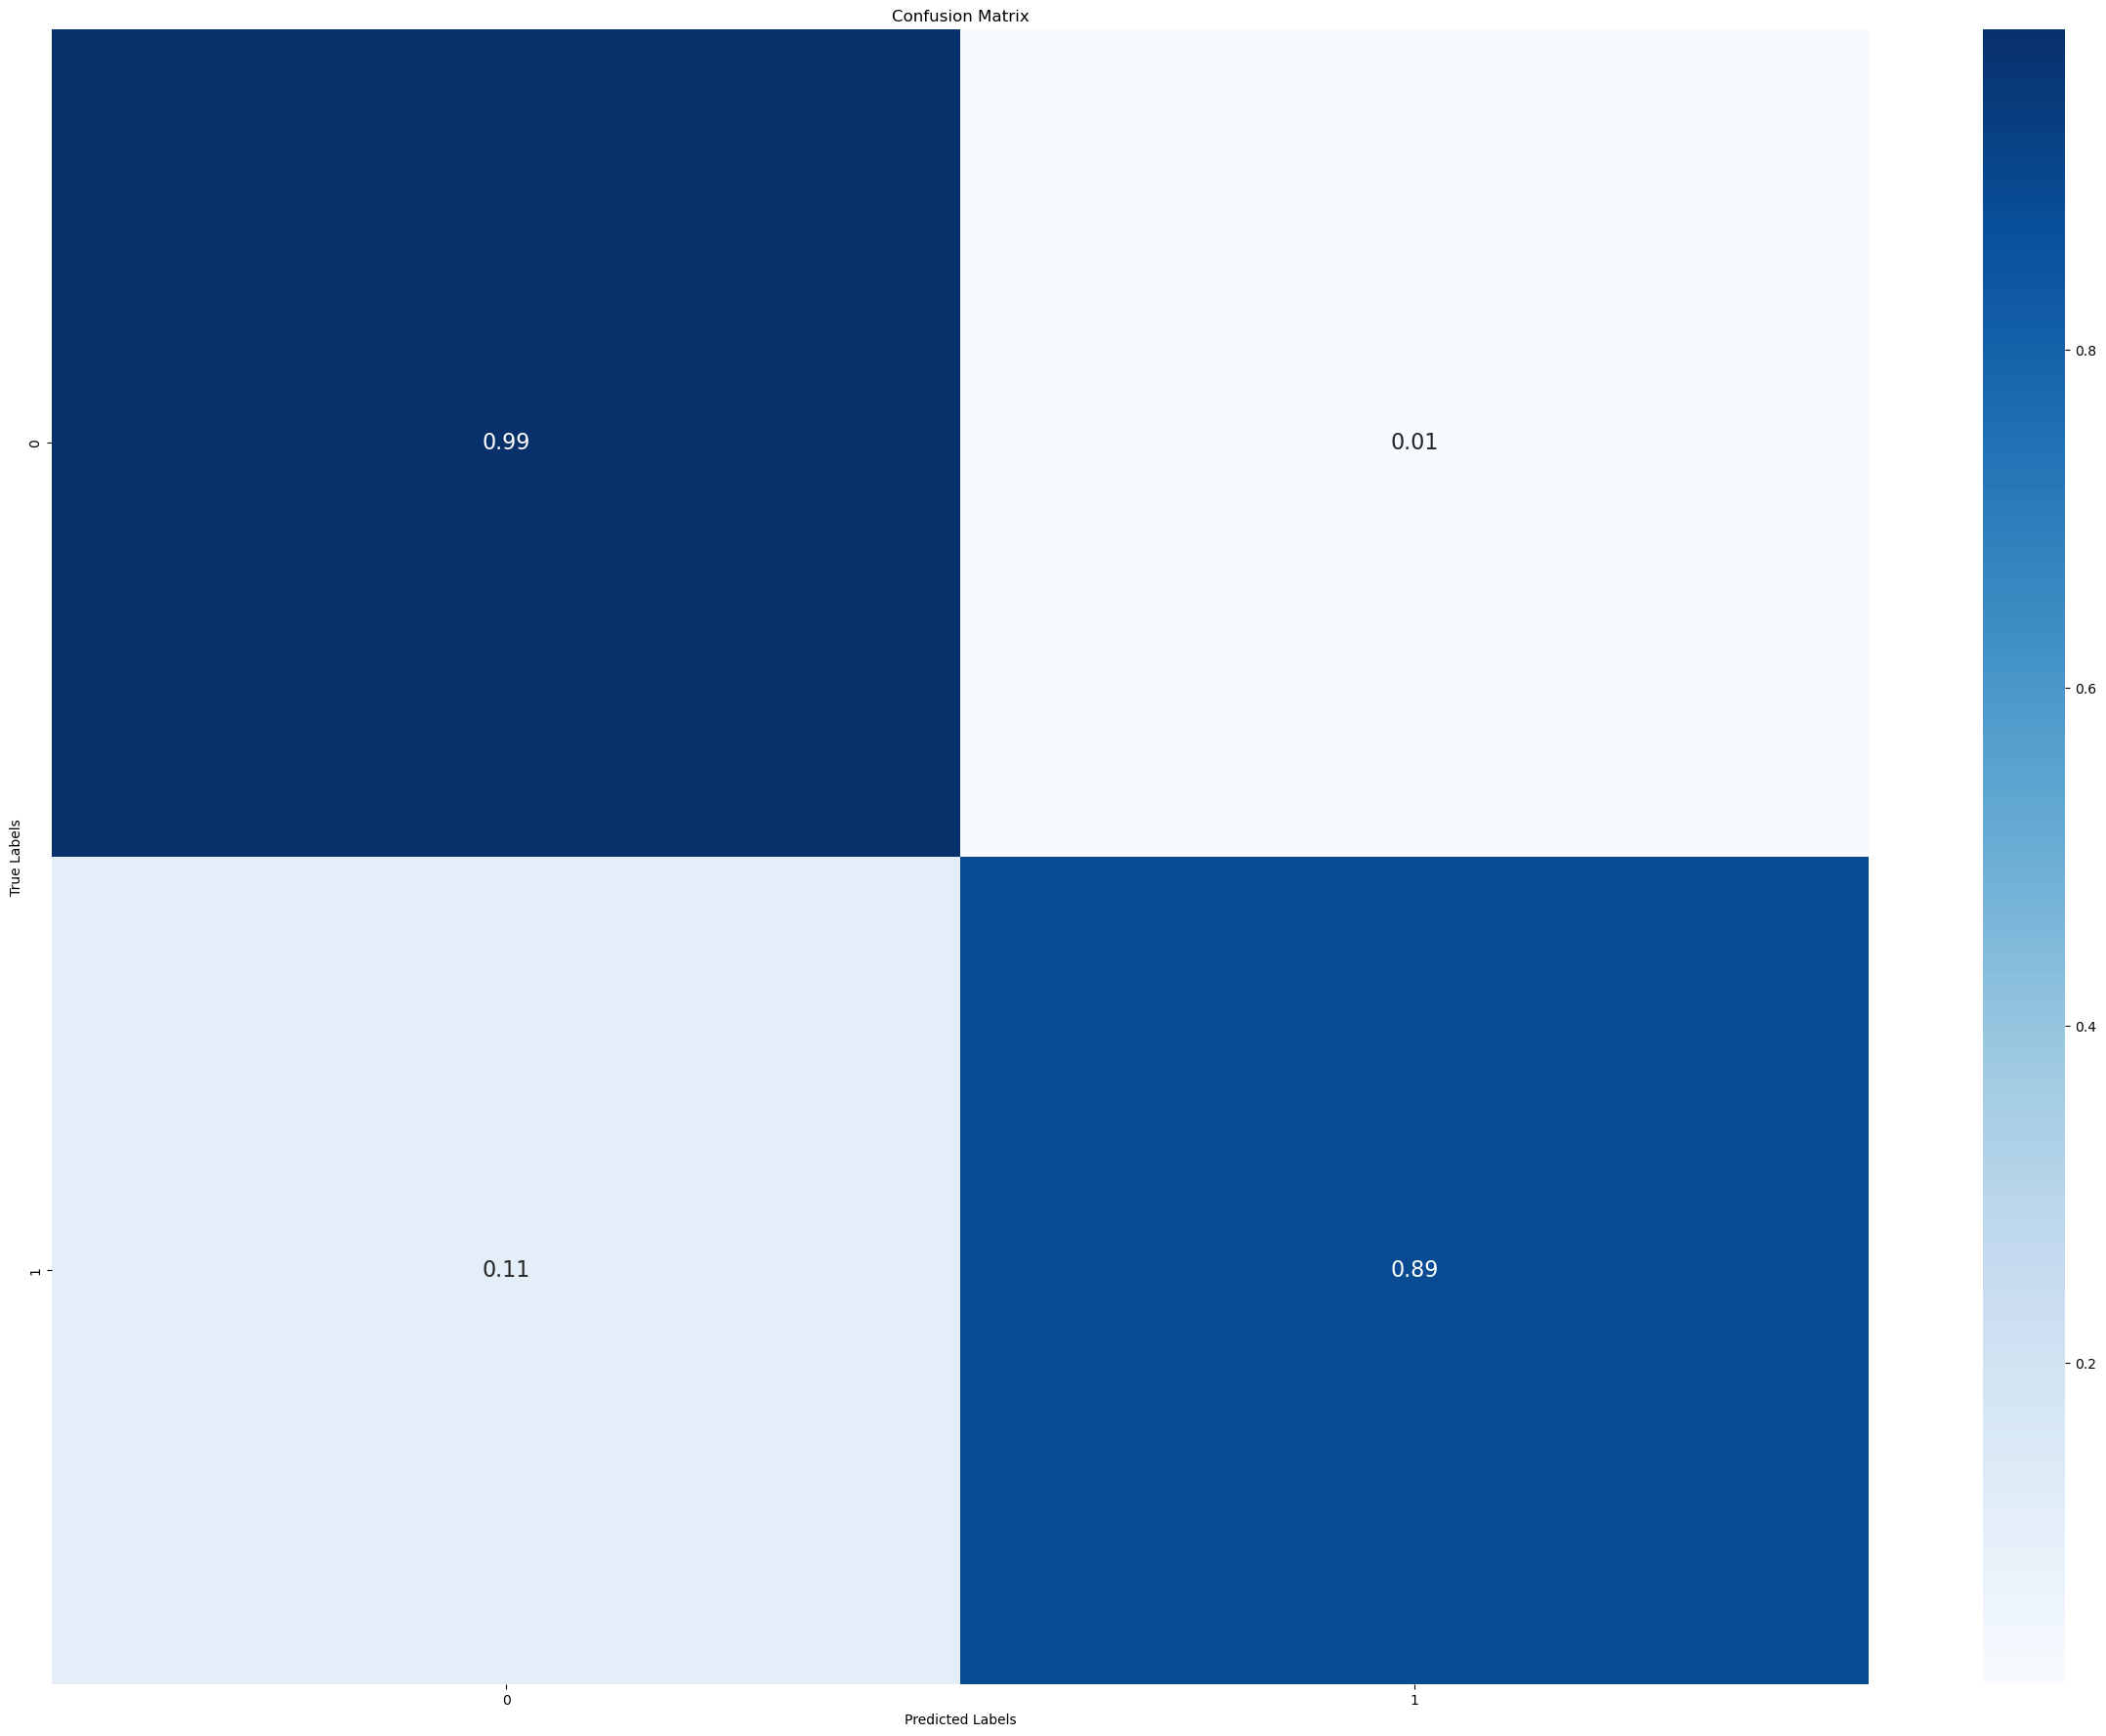

100%|██████████| 2/2 [00:00<00:00, 20.58it/s]


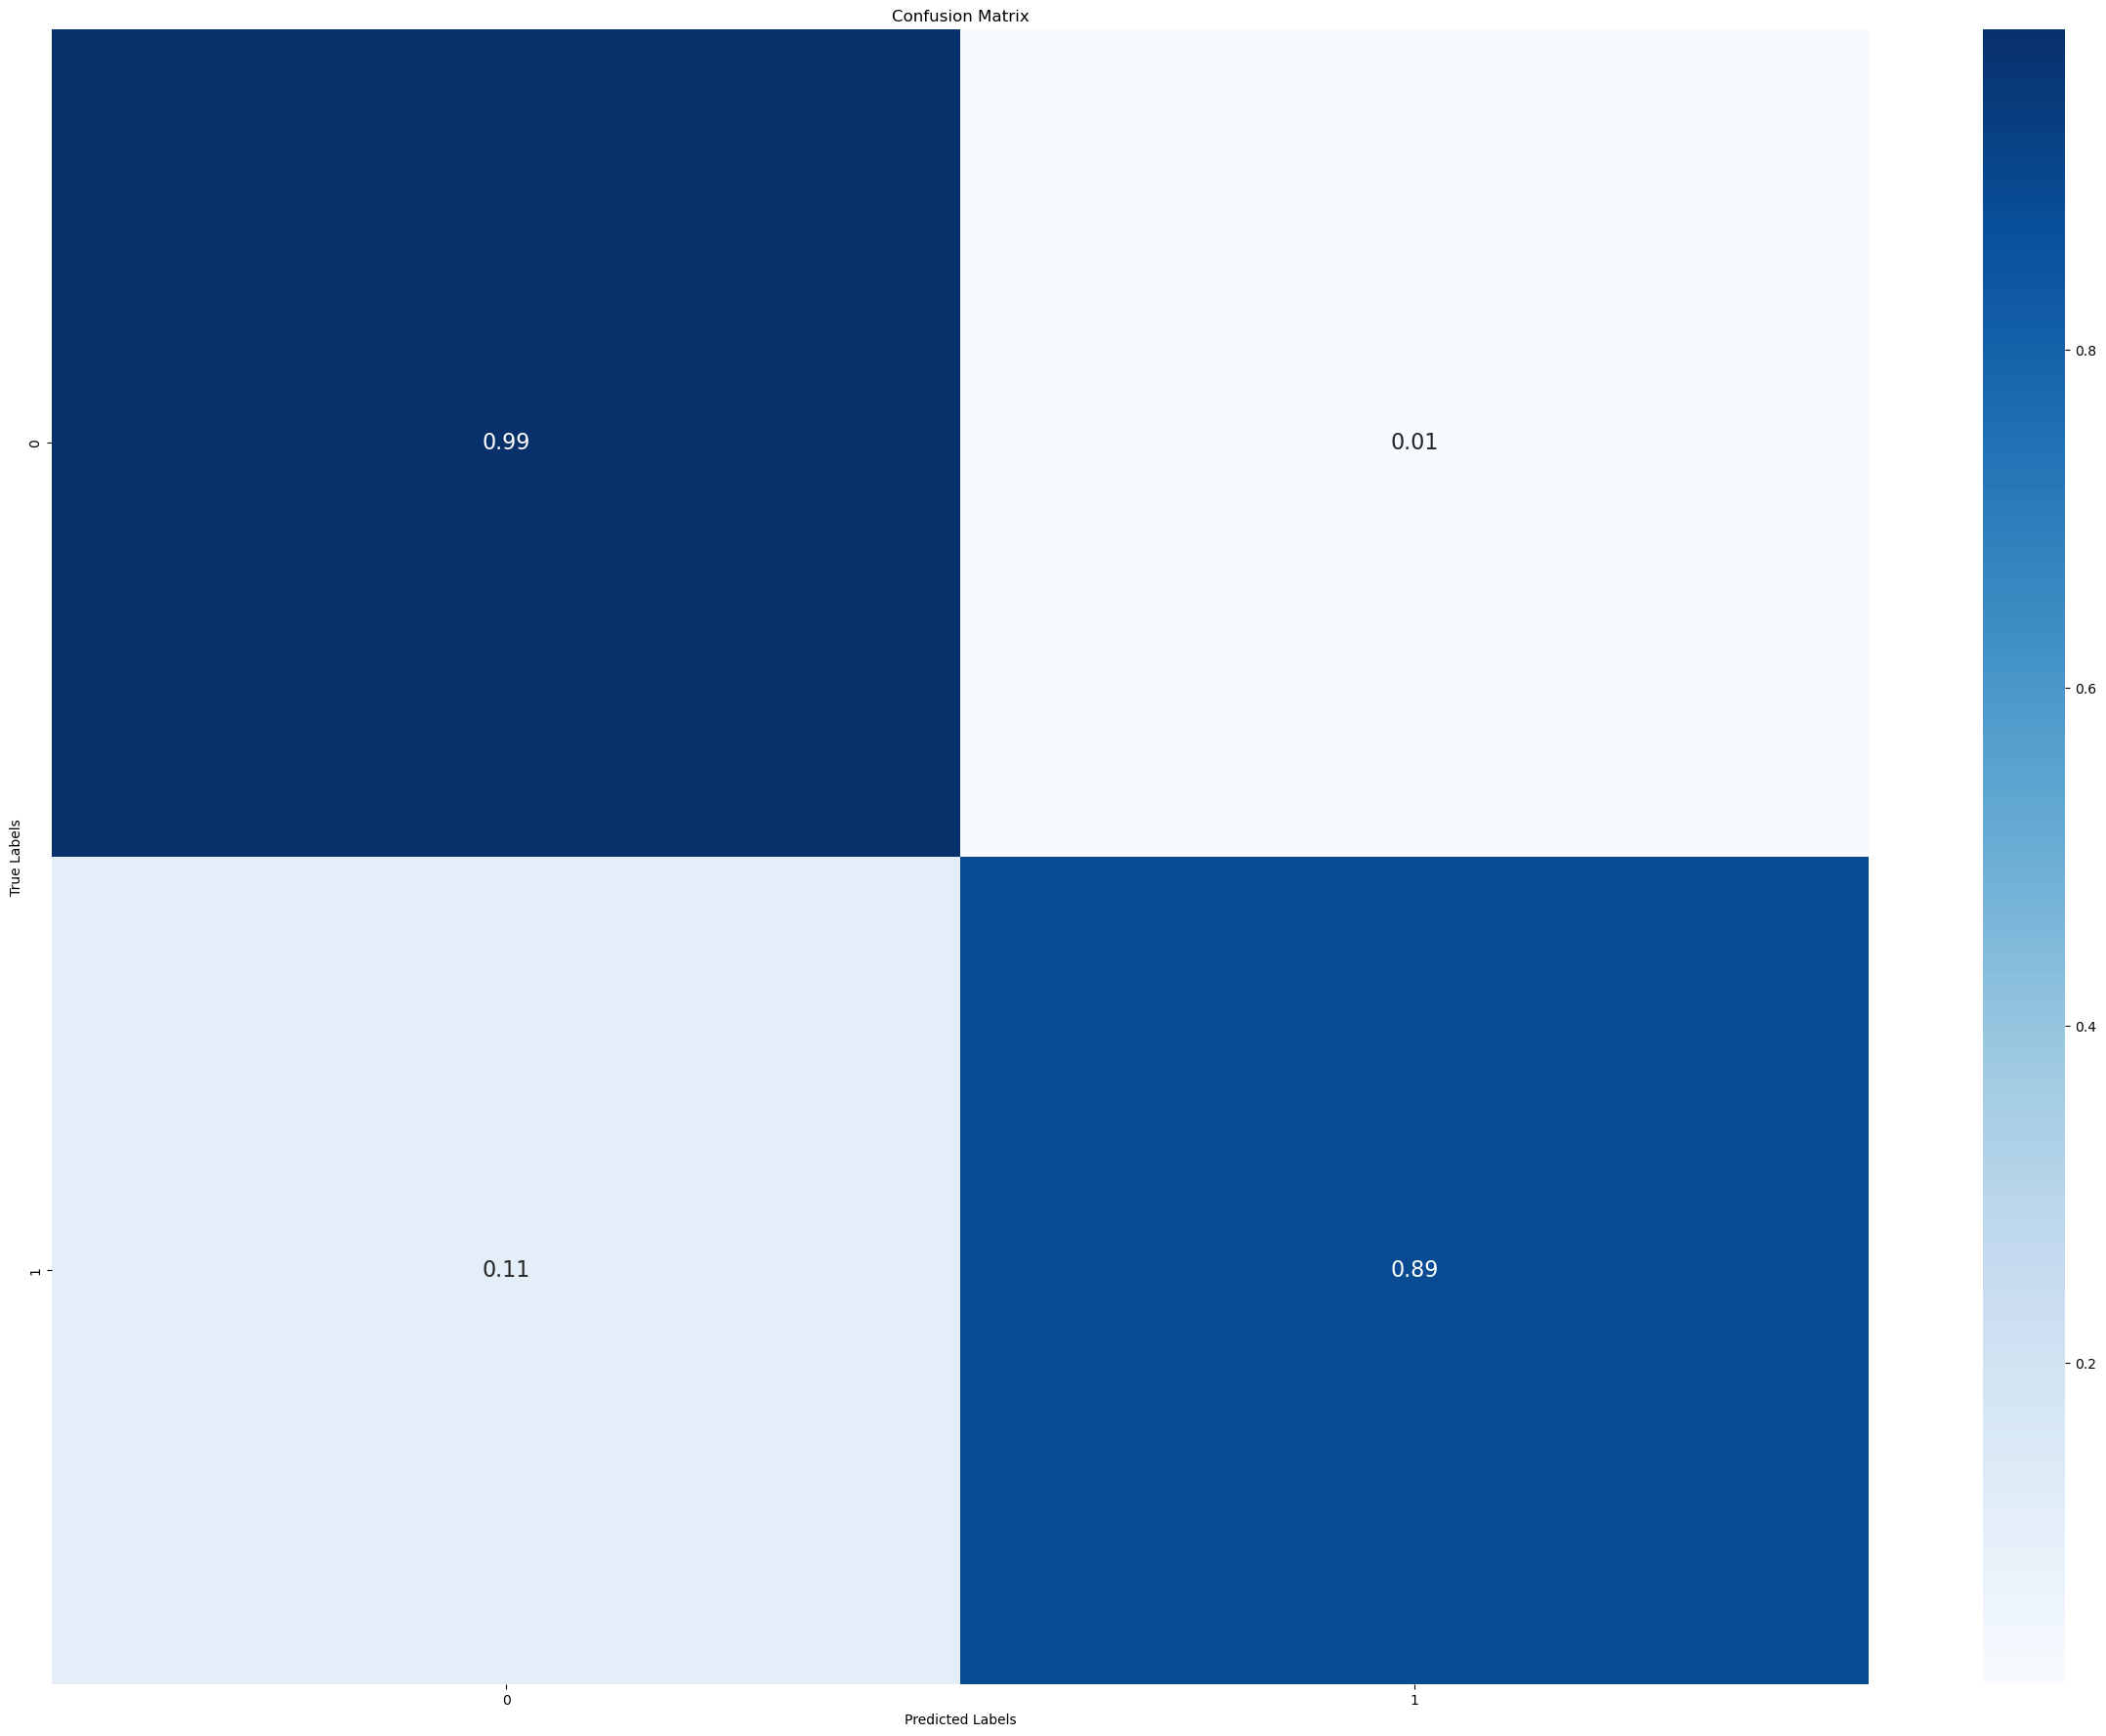

 56%|█████▌    | 5/9 [07:26<05:48, 87.18s/it]  File "c:\Users\mlcra\AppData\Local\Programs\Orange\lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
100%|██████████| 2/2 [00:00<00:00, 18.73it/s]


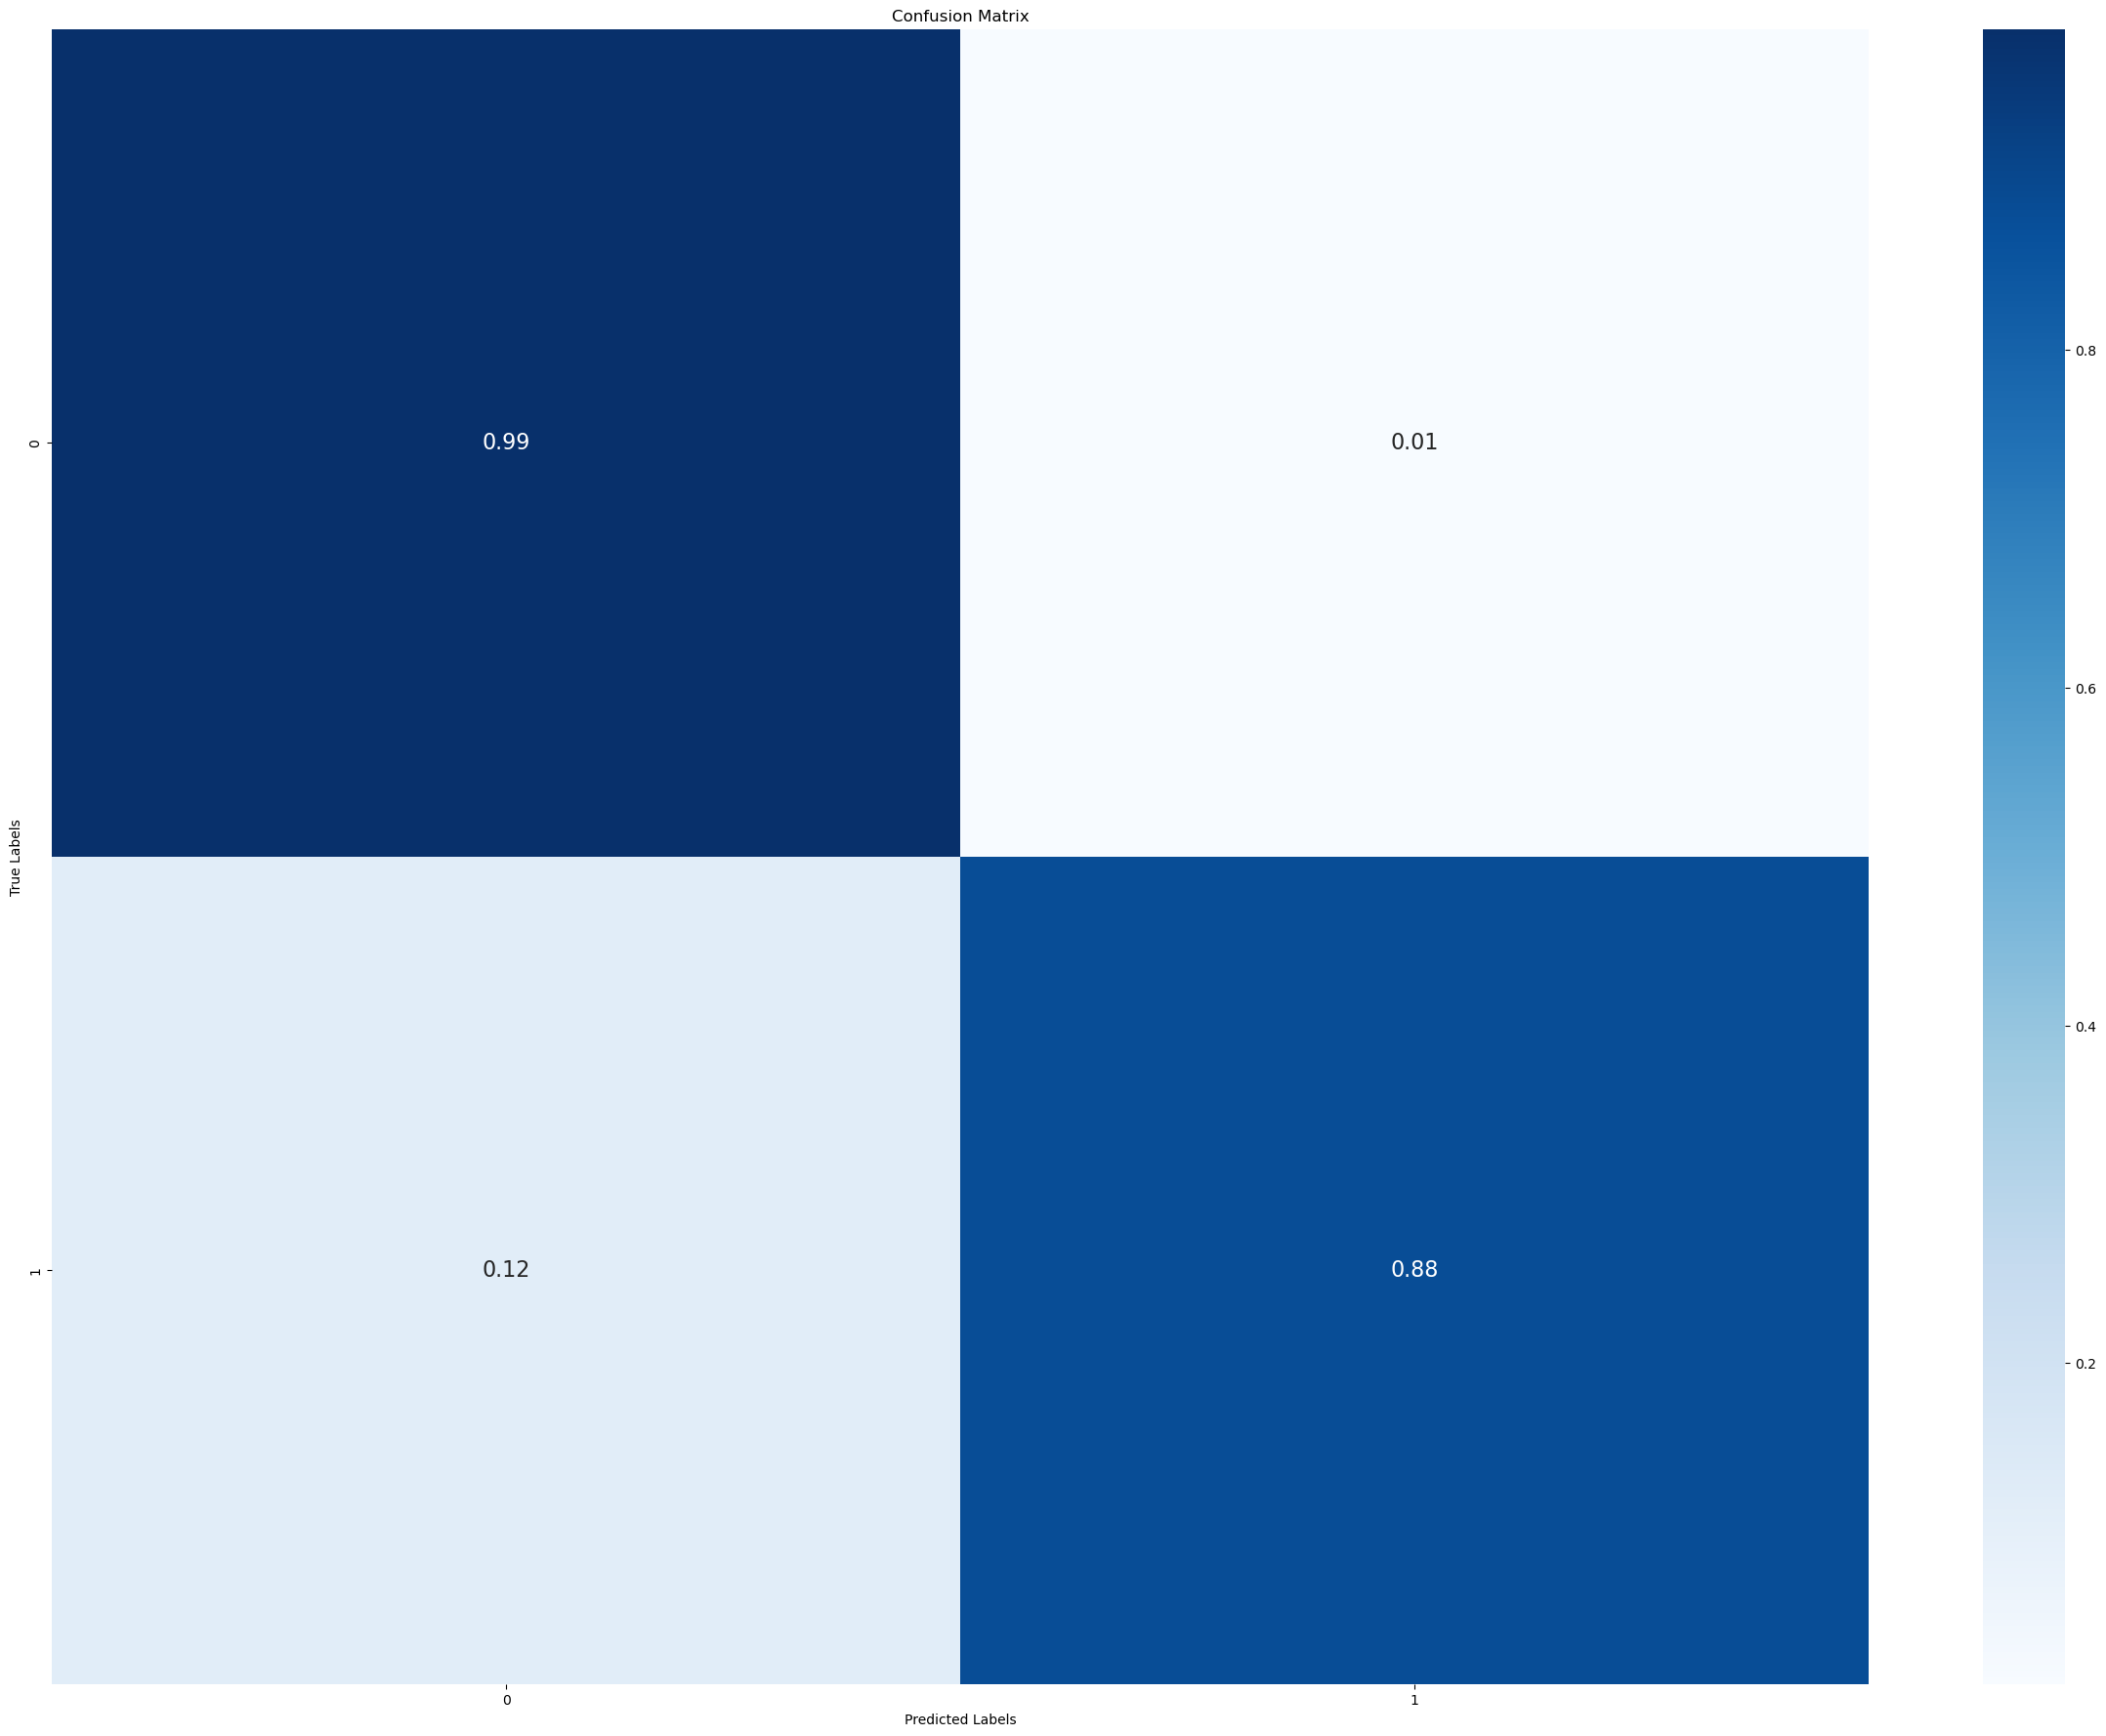

100%|██████████| 2/2 [00:00<00:00, 22.71it/s]


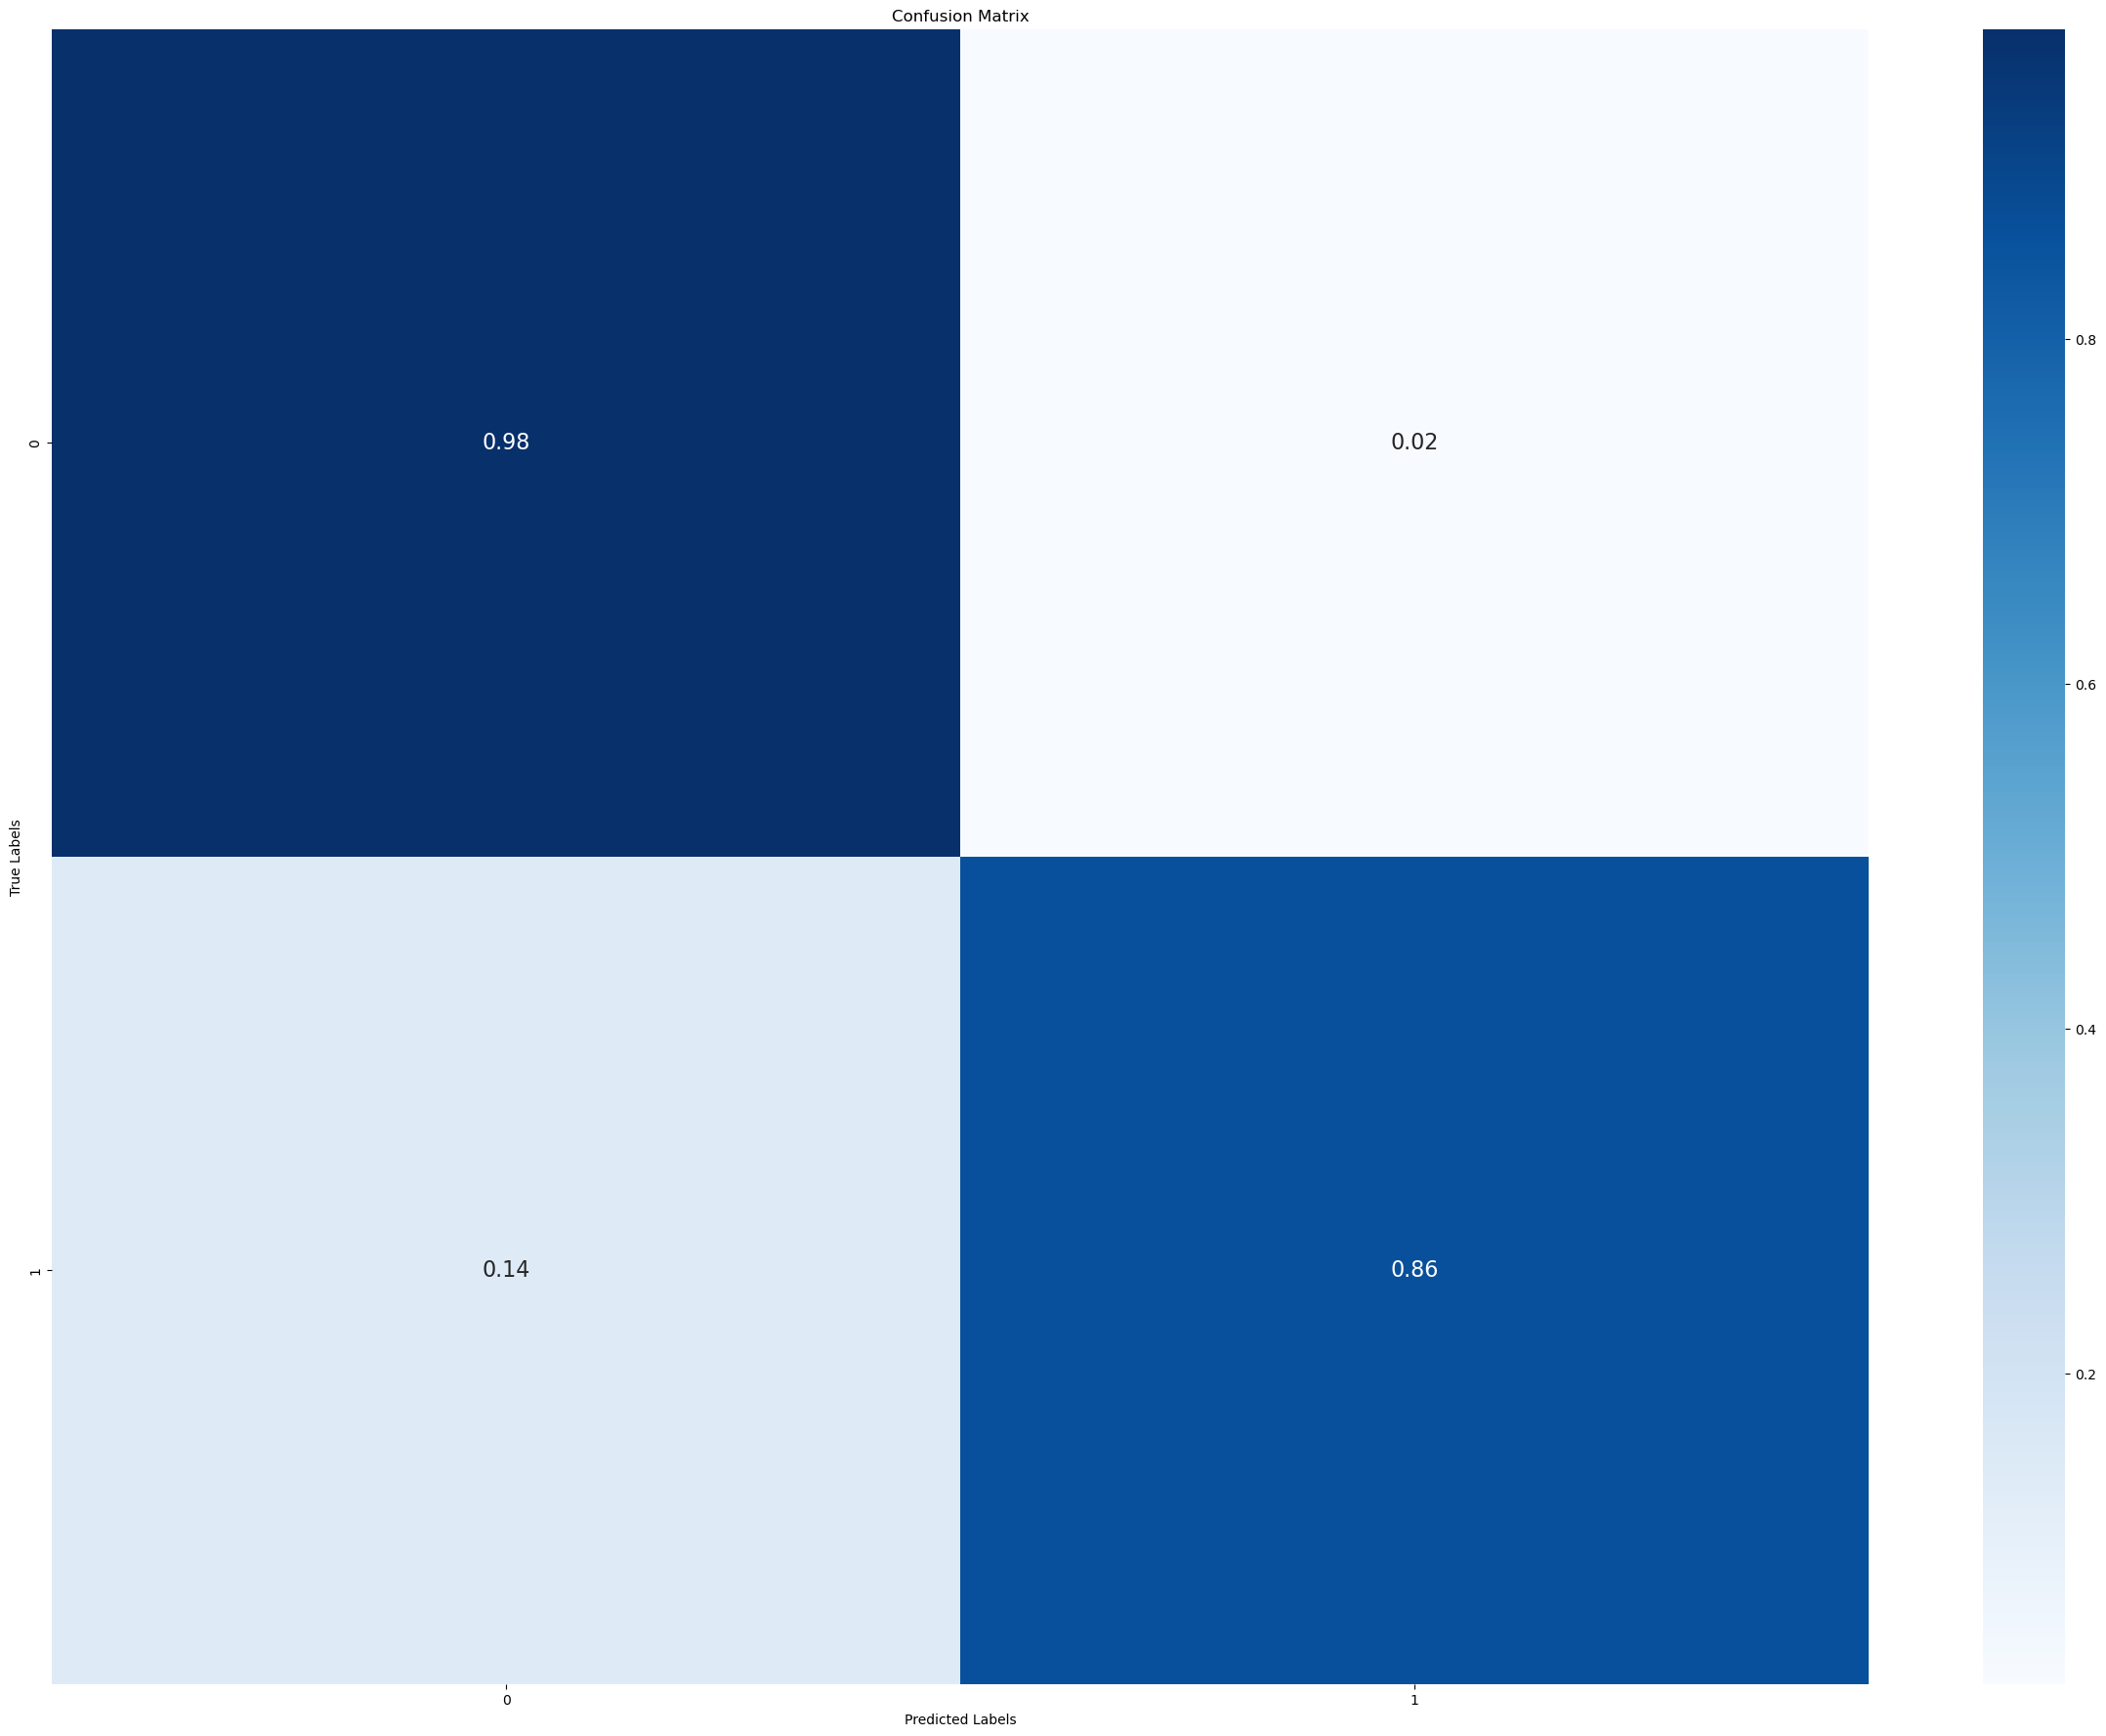

100%|██████████| 2/2 [00:00<00:00, 23.07it/s]


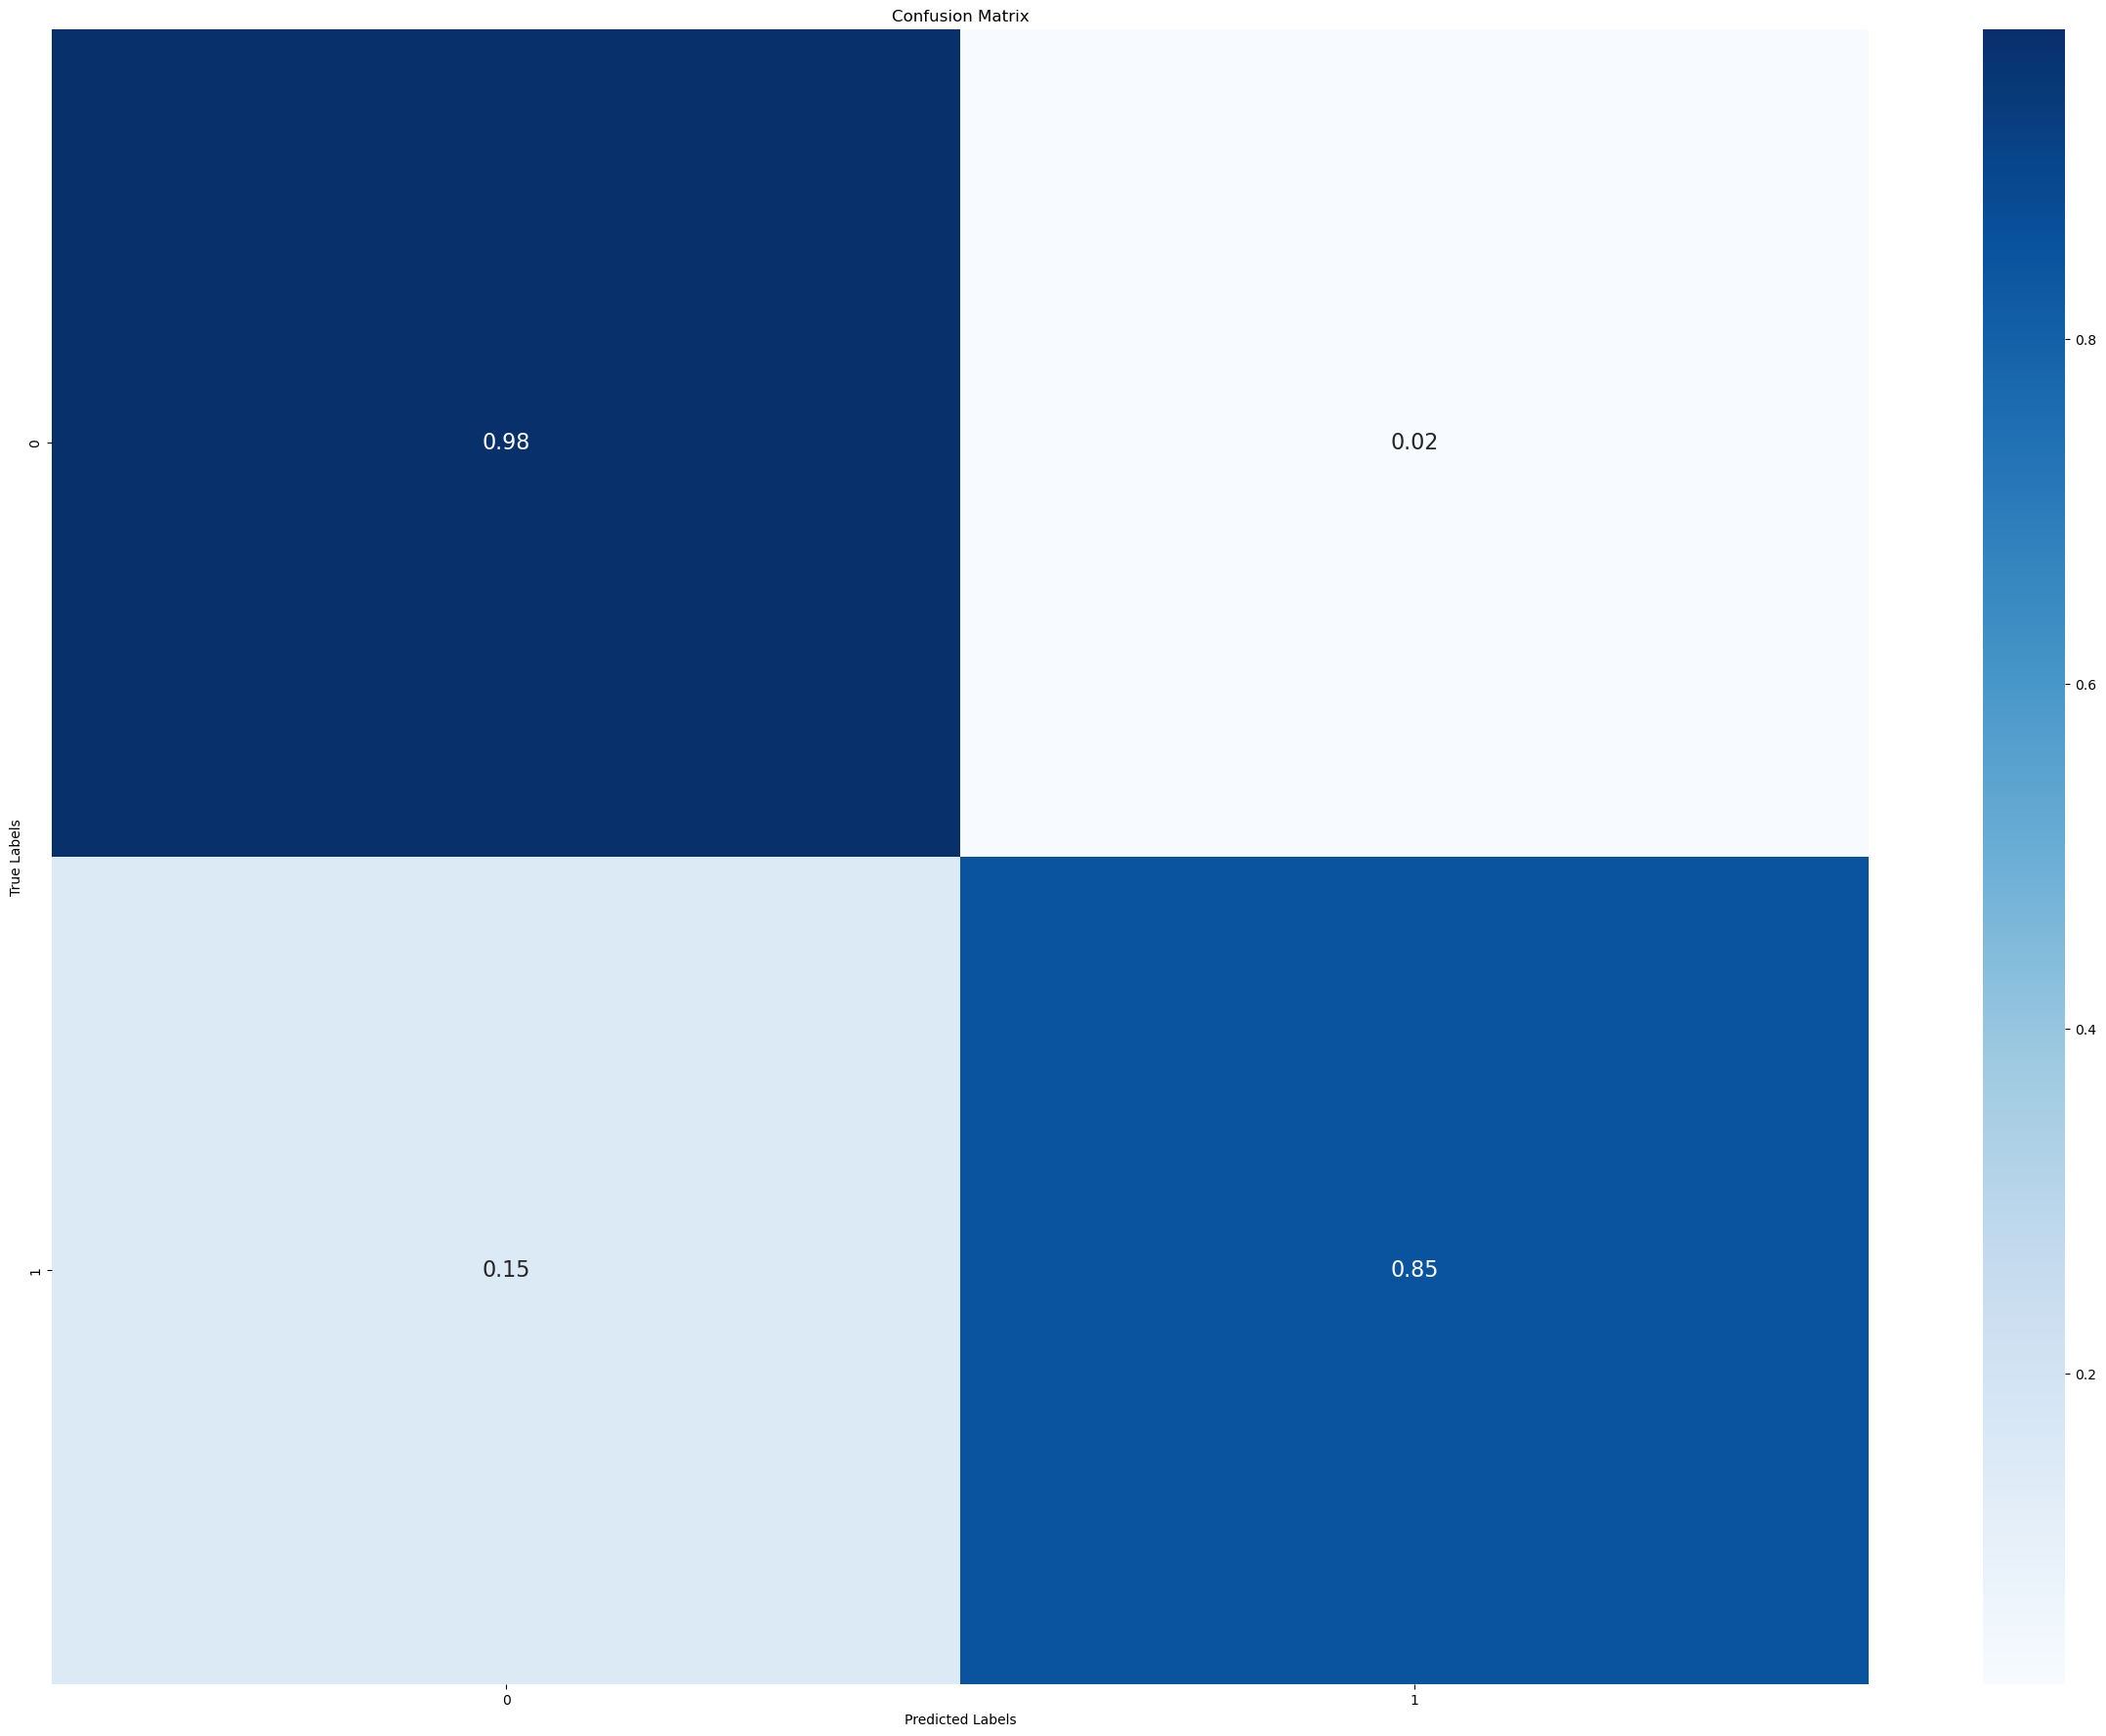

100%|██████████| 2/2 [00:00<00:00, 20.81it/s]


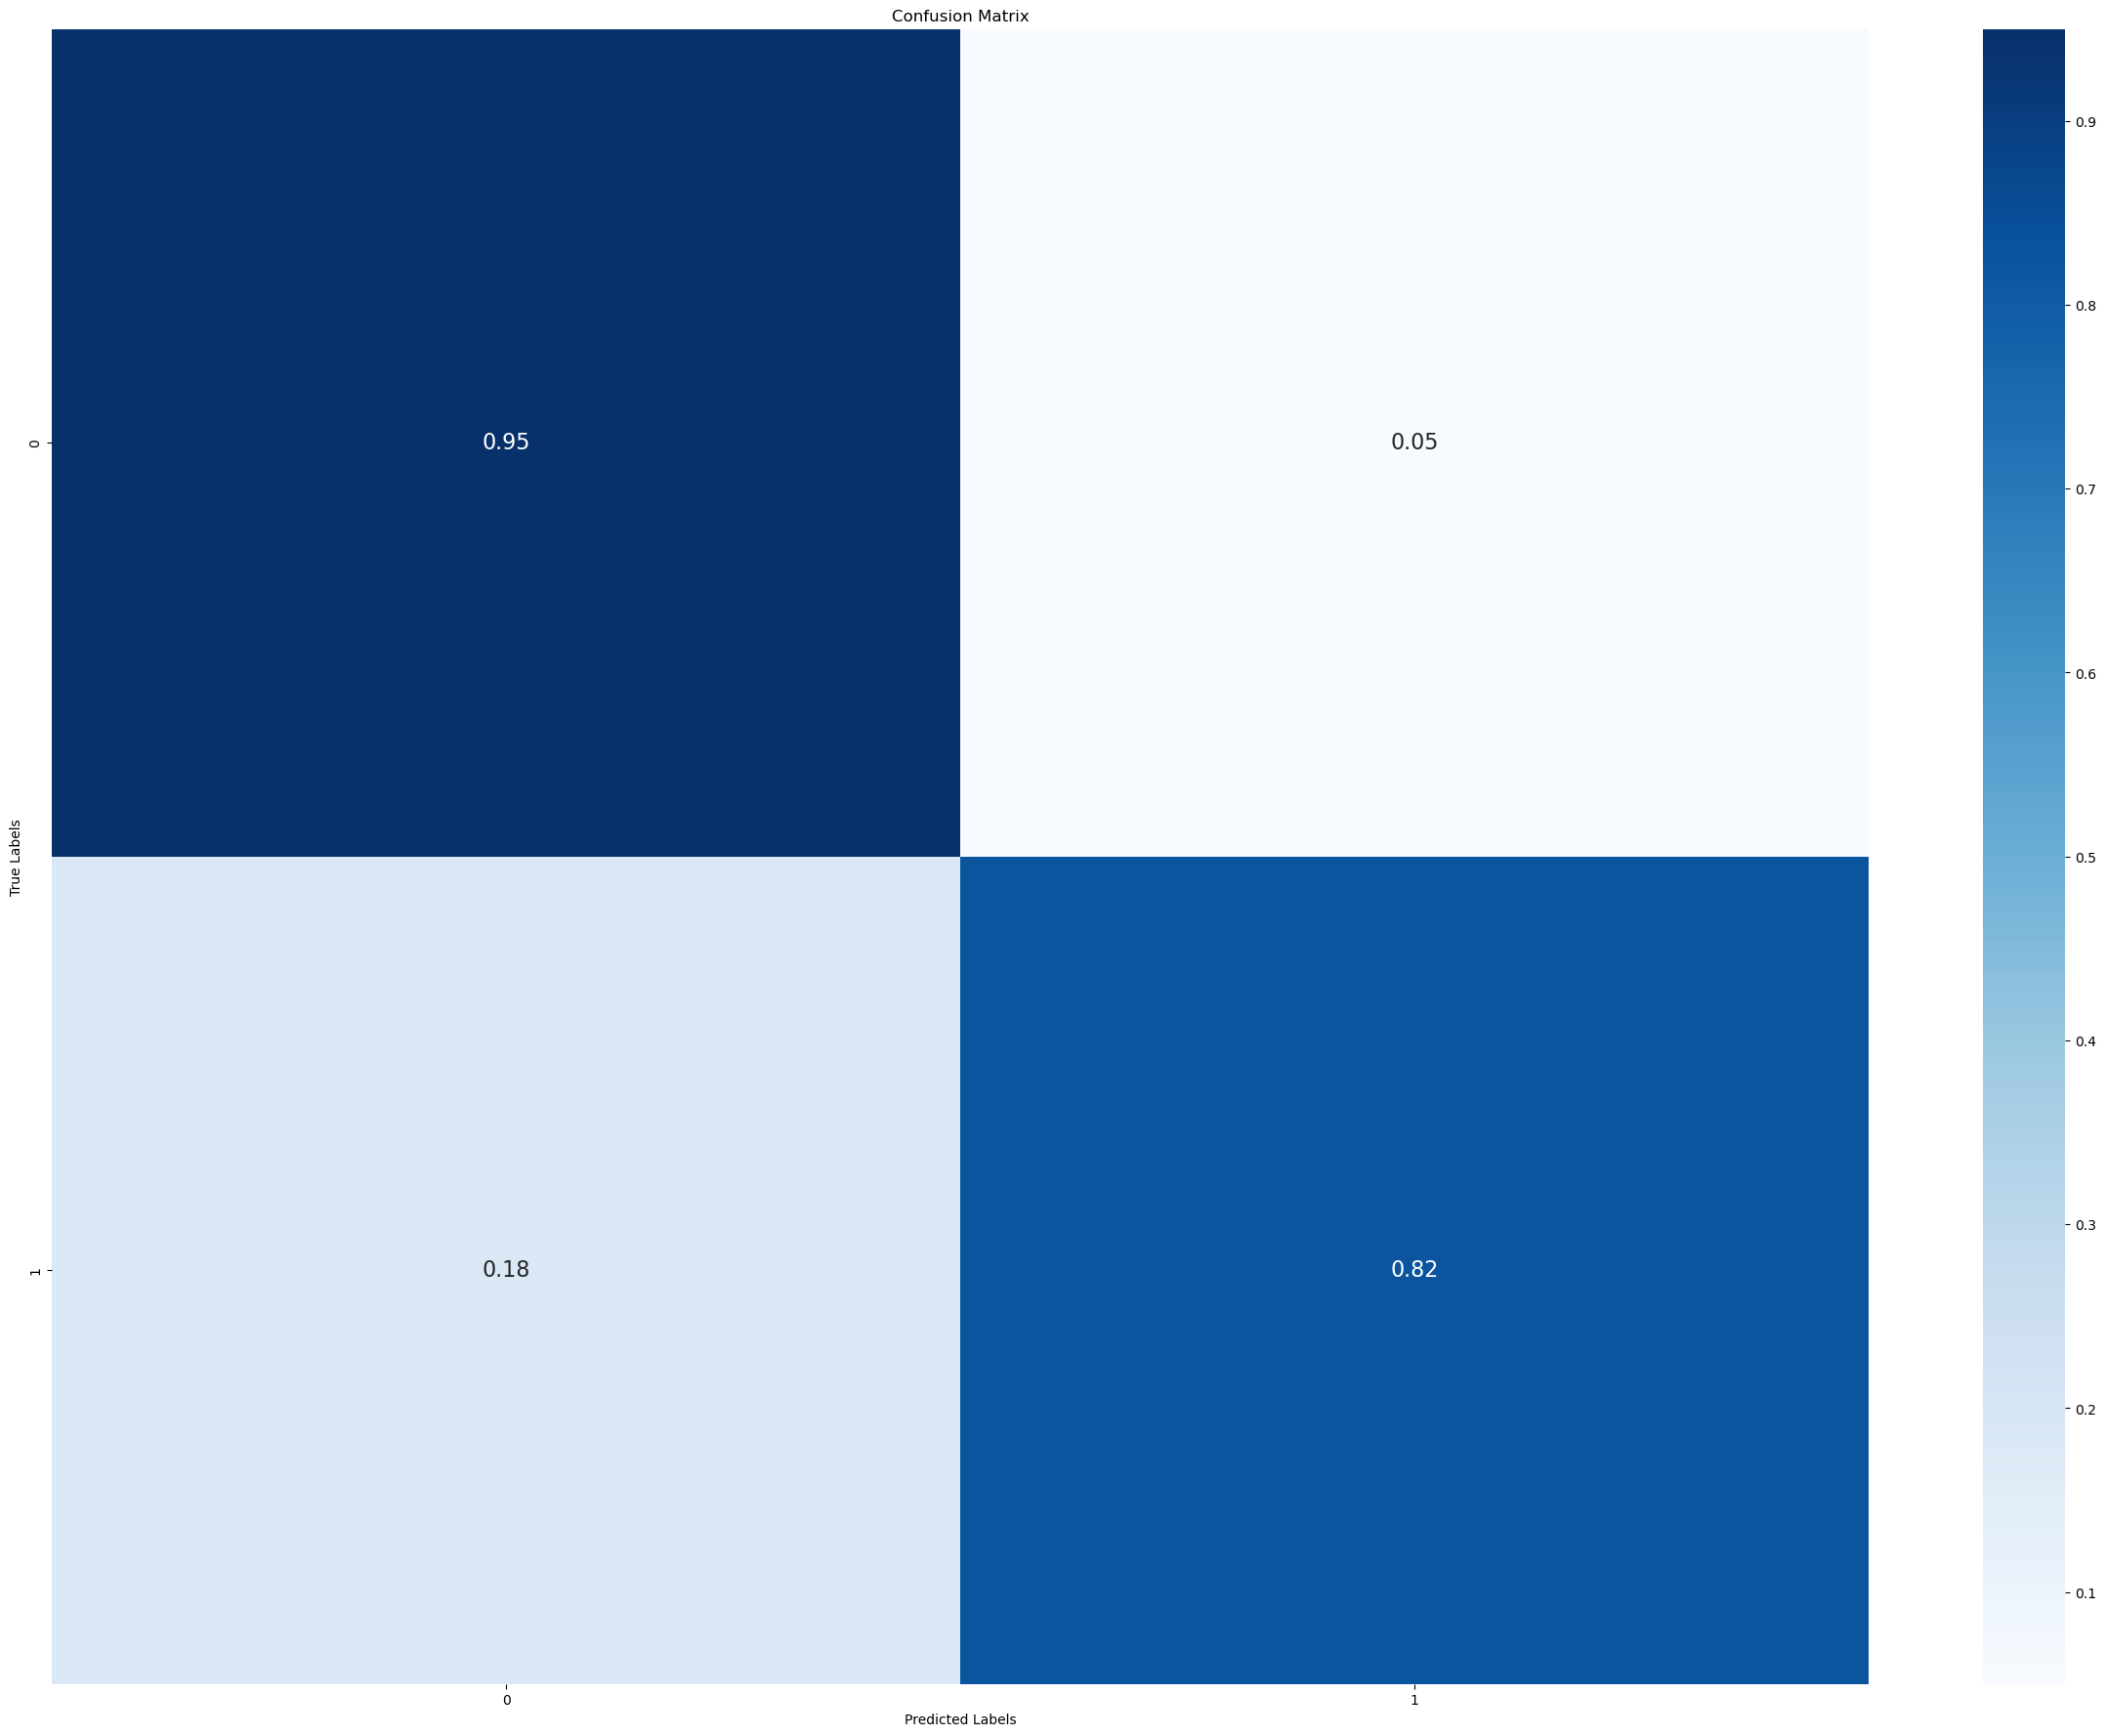

100%|██████████| 9/9 [39:44<00:00, 264.96s/it]


['.\\Recon_model\\Binary\\encoder.joblib']

In [27]:
# Import or define encoder and performance dataframe
encoder = get_or_define_encoder(model_path_binary)
performance = get_or_define_performance_df(model_path_binary, performance_path)

# Load selected X columns
selected_X = pd.read_csv(model_path_binary+'selected_X_columns.csv').values

# Map selected X columns
selected_X = list(map(lambda x: x[0], selected_X))

# Buidling models
for model in tqdm(simpleModelsDef):
    # Build model
    performance, encoder = build_model_multifiltered(model['Model'], 'SF_'+model['Name'], train_sets, test_sets, file_path, performance, model_path_binary+'SF_', X_columns=selected_X, y_column=z_column, encoder=encoder, scaler=scaler, confusionMatrix=True)

    # Save performance
    performance.to_csv(model_path_binary + performance_path, index=False)

# Save the encoder to a file
joblib.dump(encoder, model_path_binary+'encoder.joblib')

#### Complex models

In [11]:
complexModelsDitionnary = [
    {
        "Name": "Voting (Cat, XGB, RF)",
        "Model": VotingClassifier([
            ('Cat', CatBoostClassifier(random_state = 42, verbose = 0)),
            ('XGB', XGBClassifier(random_state = 42)),
            ('RF', RandomForestClassifier(random_state = 42)),
            ],
            voting='soft')
    },
    {
        "Name": "Bagging (Cat)",
        "Model": BaggingClassifier(base_estimator=CatBoostClassifier(random_state = 42, verbose = 0), n_estimators=15)
    },
    {
        "Name": "Stacking (Cat, XGB, RF)",
        "Model": StackingClassifier([
            ('XGB', XGBClassifier(random_state = 42)),
            ('RF', RandomForestClassifier(random_state = 42)),
            ],
            final_estimator=CatBoostClassifier(random_state = 42, verbose = 0),
            cv=5)
    },
]

In [12]:
# Import or define encoder and performance dataframe
encoder = get_or_define_encoder(model_path_binary)
performance = get_or_define_performance_df(model_path_binary, performance_path)

# Buidling models
for model in complexModelsDitionnary:
    # Build model
    performance, encoder = build_model_multifiltered(model['Model'], model['Name'], train_sets, test_sets, file_path, performance, model_path_binary + "complex_", X_columns=X_columns, y_column=z_column, encoder=encoder, scaler=scaler, confusionMatrix=False)

    # Save performance
    performance.to_csv(model_path_binary + performance_path, index=False)

# Save the encoder to a file
joblib.dump(encoder, model_path_binary+'encoder.joblib')

100%|██████████| 2/2 [00:00<00:00, 21.01it/s]


['.\\Recon_model\\Binary\\encoder.joblib']

#### Hyperparameters tuning

In [15]:
param_space_decision_tree = {
    'max_depth': (1, 20),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 20),
}

param_space_random_forest = {
    'n_estimators': (10, 200),
    'max_depth': (1, 20),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 20),
    'max_features': (0.1, 1.0),
}

param_space_xgboost = {
    'n_estimators': (10, 200),
    'max_depth': (1, 20),
    'learning_rate': (0.01, 1.0),
}

simpleModelsDef[0]['param_space'] = param_space_decision_tree
simpleModelsDef[1]['param_space'] = param_space_random_forest
simpleModelsDef[2]['param_space'] = param_space_xgboost

In [16]:
path_to_save = '.\\Recon_model\\Binary\\'
performance_path = 'tuning_performance.csv'

try:
    # Load the encoder from a file
    encoder = joblib.load(path_to_save+'encoder.joblib')
except:
    # scaler = MinMaxScaler()
    encoder = LabelEncoder()

# Hyperparameters tuning models
for model in tqdm(simpleModelsDef):
    optimize_hyperparameters(model['Model'], model['Name'], file_path, path_to_save, model['param_space'], train_sets, X_columns, y_column=z_column, encoder=encoder, scaler=scaler, n_splits=5, n_iter=10)


# try:
#     # Load performance dataframe
#     performance = read_csv_file(performance_path, model_path)
# except:
#     # Define performance dataframe
#     performance = pd.DataFrame(columns=['Model', 'Accuracy Training', 'Recall Training', 'Precision Training', 'F1 Training', 'Accuracy Testing', 'Recall Testing', 'Precision Testing', 'F1 Testing', 'FU_rate', 'FL_rate', 'FU', 'FL', 'Total rows'])

# # Buidling models
# for model in tqdm(simpleModelsDef):
#     # Build model
#     performance, encoder = build_model(model['Model'], model['Name'], train_sets, test_sets, file_path, performance, model_path, X_columns=X_columns , y_column=z_column, encoder=encoder, scaler=scaler, confusionMatrix=False)

#     # Save performance
#     performance.to_csv(model_path + performance_path, index=False)

# Save the encoder to a file
joblib.dump(encoder, path_to_save+'encoder.joblib')

100%|██████████| 3/3 [3:02:20<00:00, 3646.70s/it]  


['.\\Recon_model\\Binary\\encoder.joblib']

#### Feature Importance

In [24]:
simpleModelsDef = [
    {
        "Name": "DT",
        "Model": joblib.load(model_path_binary+'model_DT.joblib')
    },
    {
        "Name": "RF",
        "Model": joblib.load(model_path_binary+'model_RF.joblib')
    },
    {
        "Name": "XGB",
        "Model": joblib.load(model_path_binary+'model_XGB.joblib')
    },
    {
        "Name": "Cat",
        "Model": joblib.load(model_path_binary+'model_Cat.joblib')
    },
    {
        "Name": "LIGHT",
        "Model": joblib.load(model_path_binary+'model_LIGHT.joblib')
    },
    {
        "Name": "GBoost",
        "Model": joblib.load(model_path_binary+'model_GBoost.joblib')
    },
    {
        "Name": "Adaboost",
        "Model": joblib.load(model_path_binary+'model_Adaboost.joblib')
    },
]

100%|██████████| 7/7 [00:00<00:00, 124.65it/s]


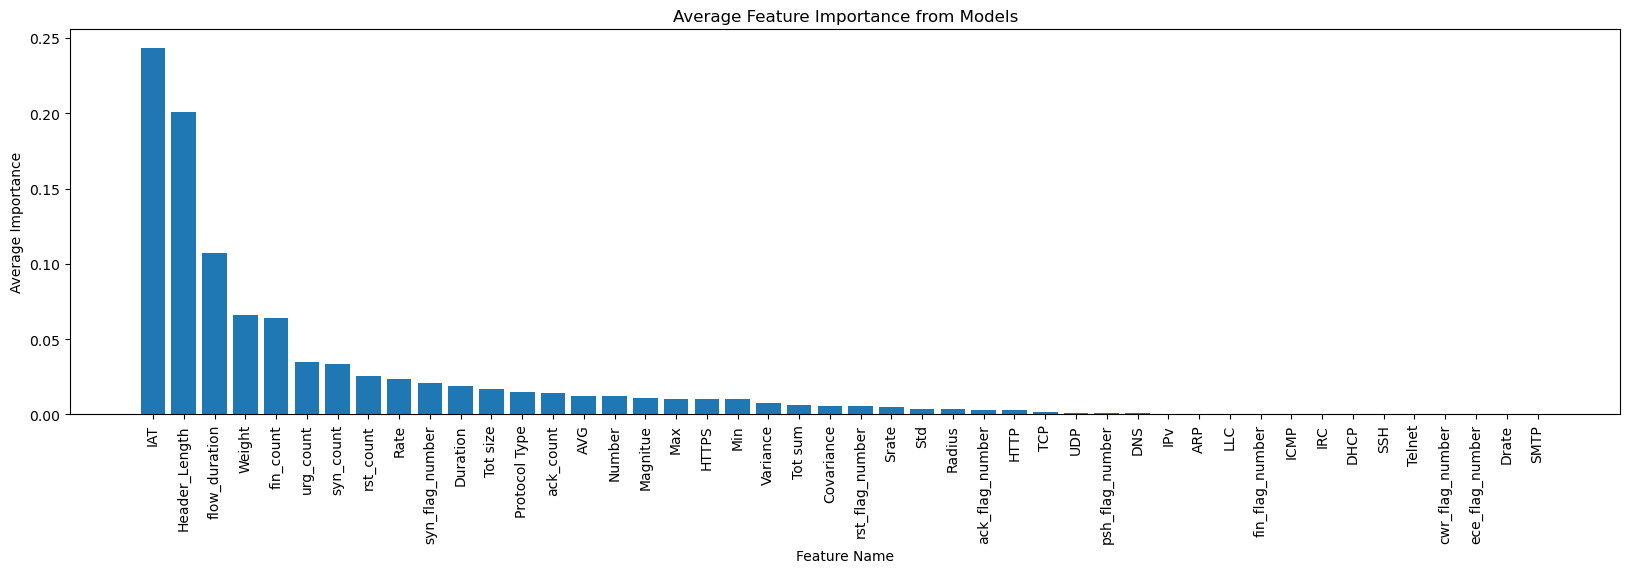

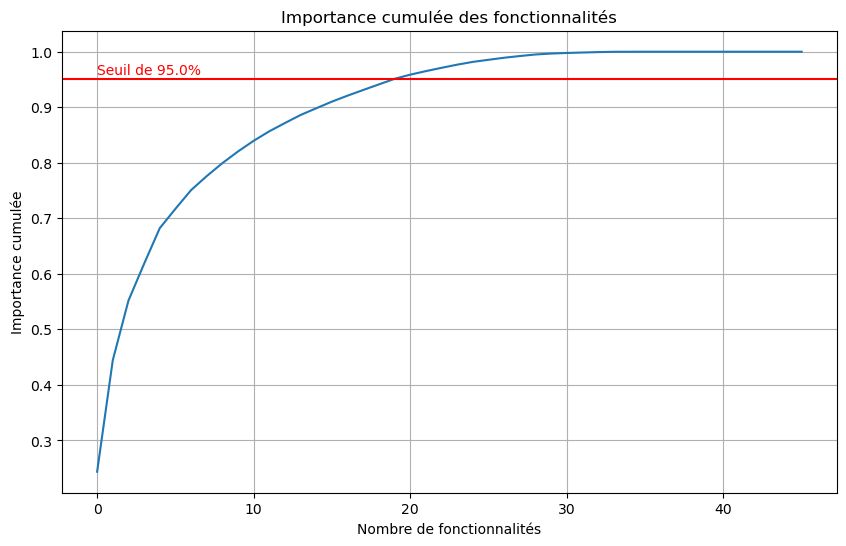

100%|██████████| 3/3 [00:02<00:00,  1.16it/s]


In [25]:
# Get feature importance
average_importance_df = calculate_and_plot_feature_importance(simpleModelsDef, X_columns, model_path_binary, all_features=True)
average_importance_df.to_csv(model_path_binary+'feature_importance.csv', index=False)
average_importance_df.to_csv('.\\resultats\\Recon\\Binary\\feature_importance.csv', index=False)

# Load feature importance dataframe
average_importance_df = pd.read_csv(model_path_binary+'feature_importance.csv')
# print(average_importance_df.head(average_importance_df.size))

selected_X = select_features_by_importance(average_importance_df['Feature'].values, average_importance_df['Average Importance'].values, model_path_binary, threshold_percentage=0.95)
pd.DataFrame(selected_X).to_csv(model_path_binary+'selected_X_columns.csv', index=False)

# Define and fit scaler
scaler = MinMaxScaler()
for train_set in tqdm(train_sets):
    scaler.fit(read_csv_file(train_set, file_path)[selected_X])

##### Some plots

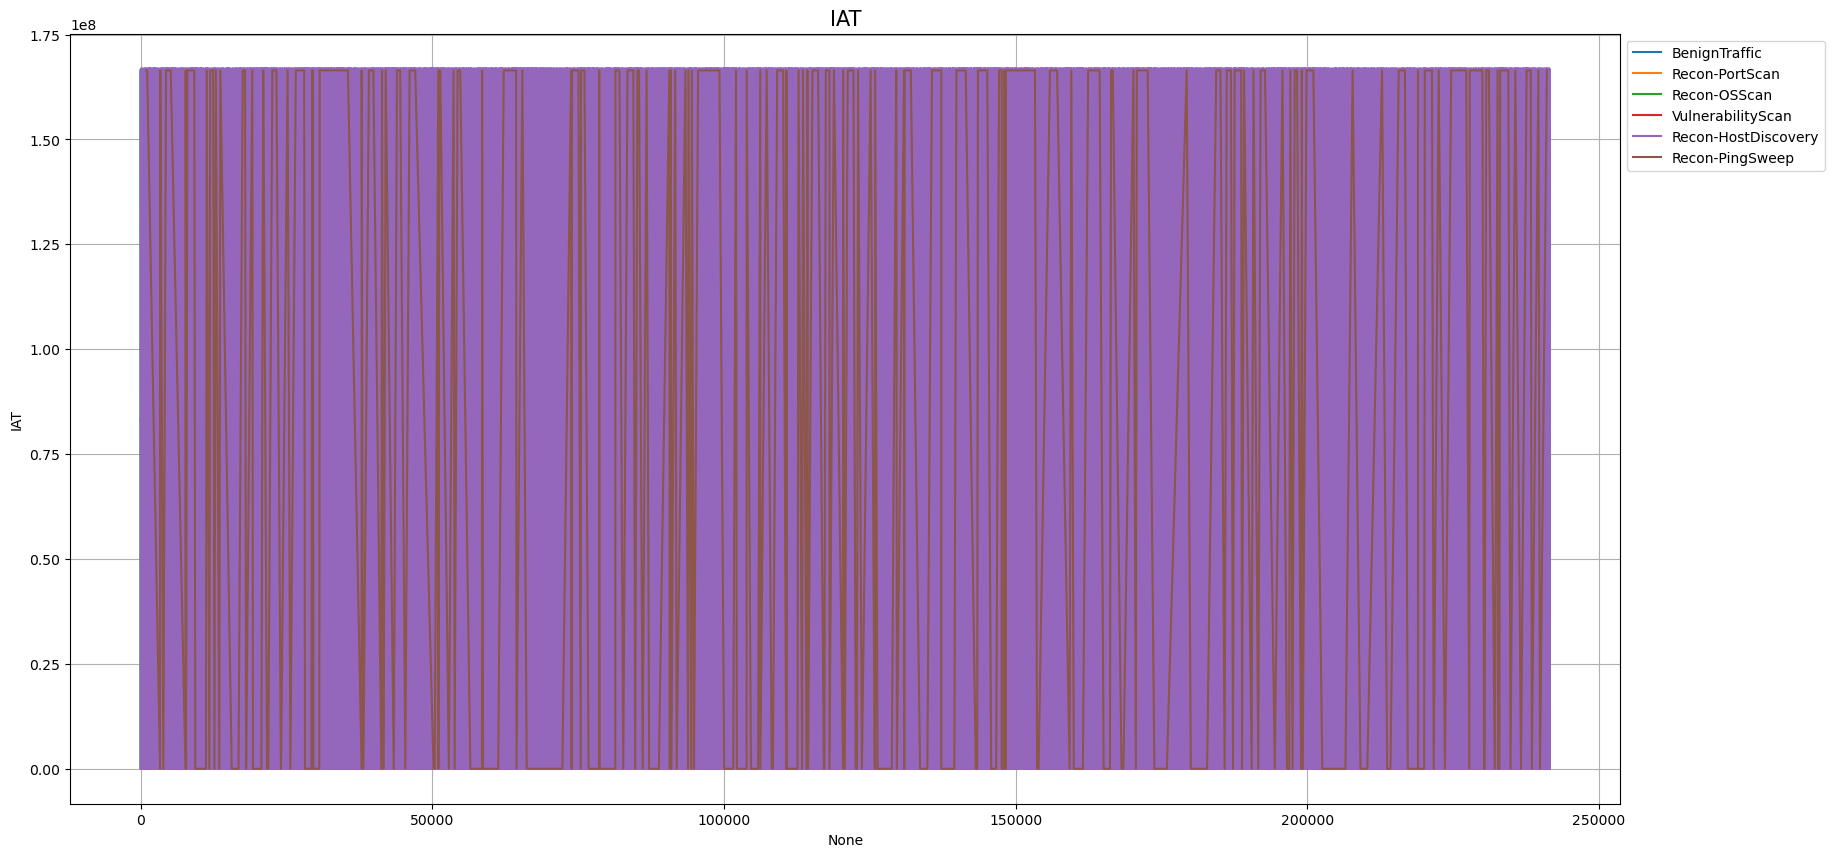

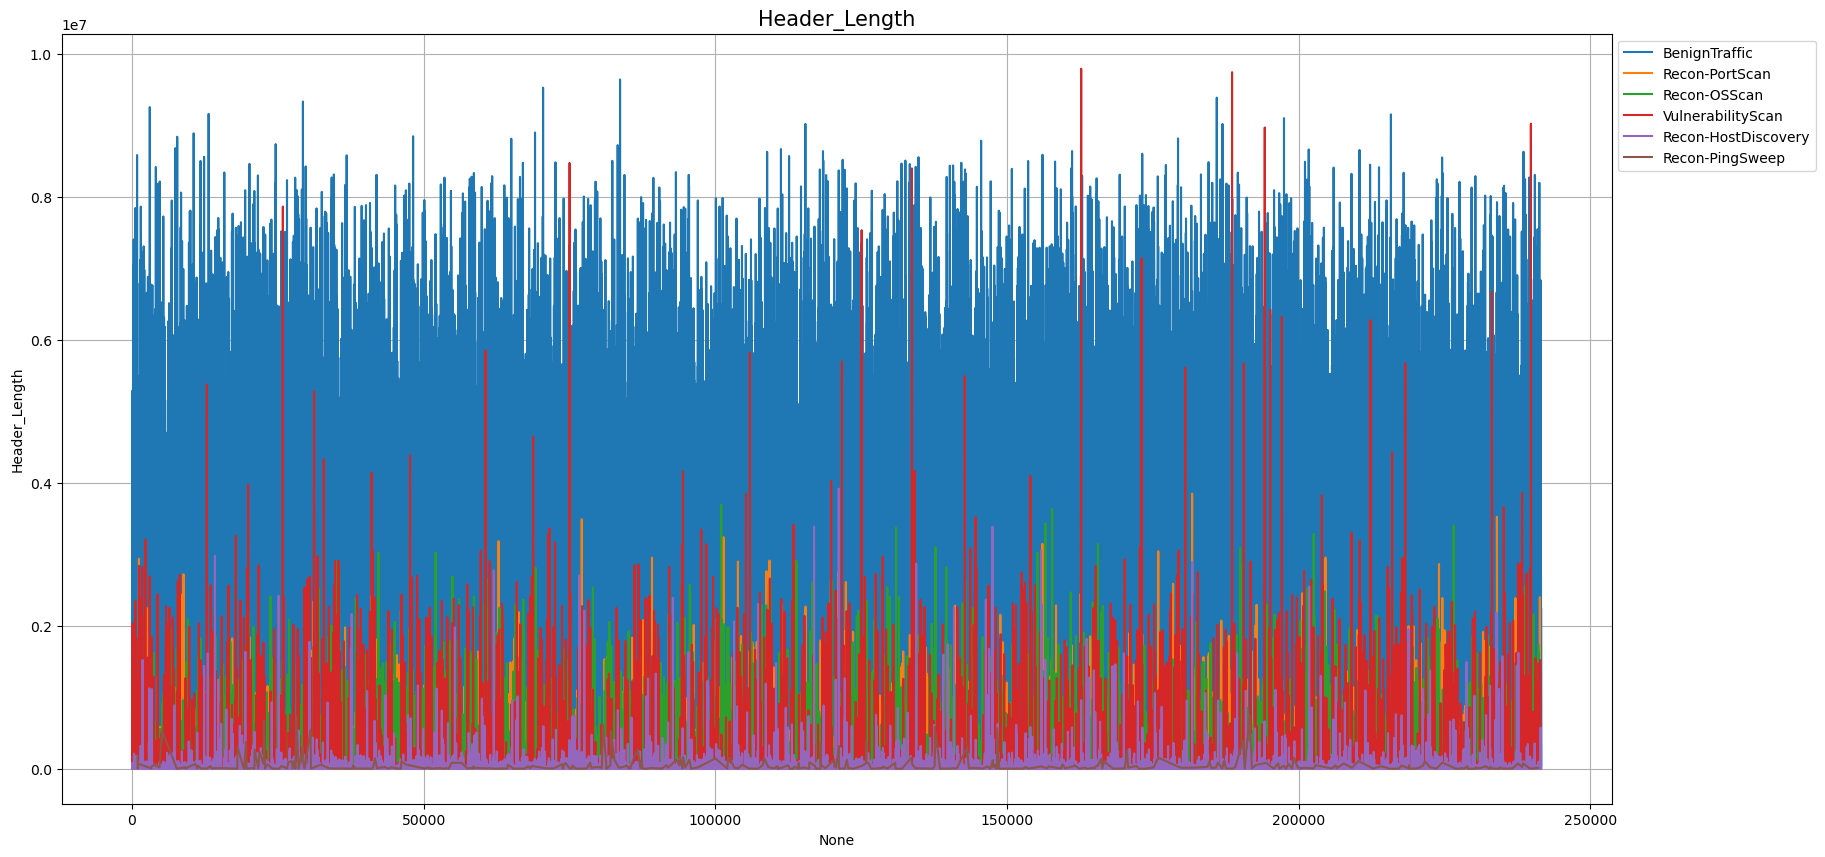

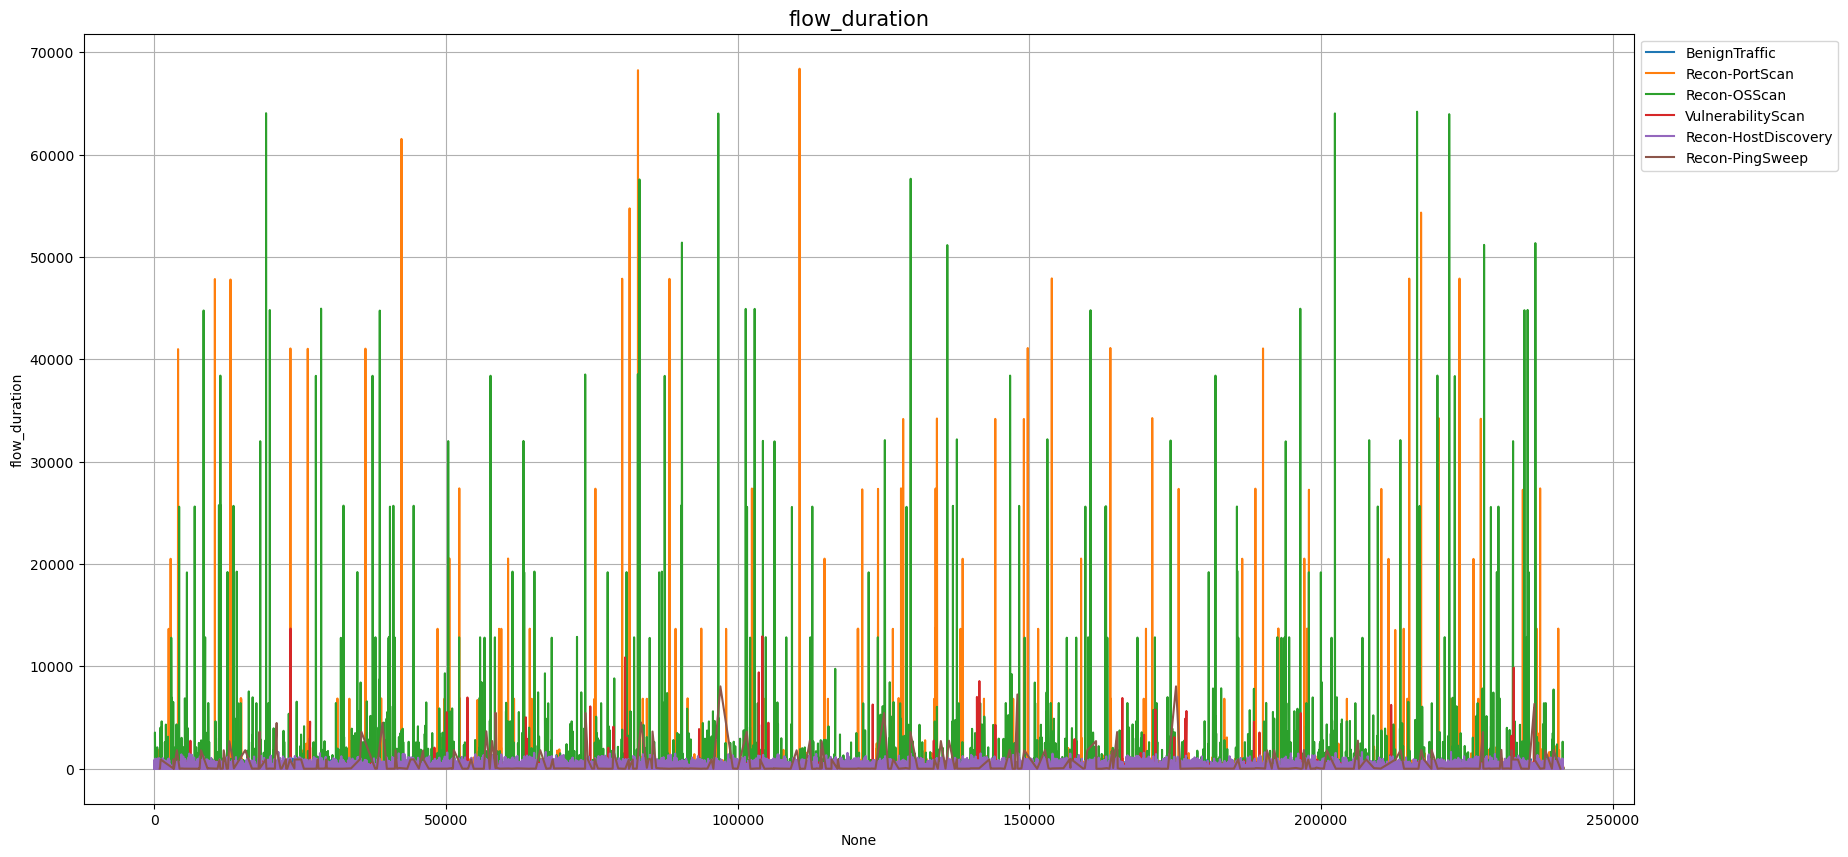

In [23]:
# Load selected X columns
selected_X = pd.read_csv(model_path_binary+'selected_X_columns.csv').values

# Map selected X columns
selected_X = list(map(lambda x: x[0], selected_X))

plot_correlation_matrix(read_csv_file(train_sets[0], file_path)[selected_X], model_path_binary+'Matrice de correlation.png', 'Matrice de correlation')

if len(selected_X) > 10:
    new_selected_X = selected_X[:10]
else:
    new_selected_X = selected_X
    
plot_pairplot(read_csv_file(train_sets[0], file_path)[new_selected_X].iloc[:1000], model_path_binary+'Pairplot.png', 'Pairplot')

plot_boxplot(read_csv_file(train_sets[0], file_path)[selected_X], model_path_binary+'Boxplot.png', 'Boxplot')

plot_kde_plot(read_csv_file(train_sets[0], file_path), selected_X[:3], model_path_binary+'KDE plot.png')

plot_lineplot(read_csv_file(train_sets[0], file_path), selected_X[:3], model_path_binary+'Lineplot')

#### Display performance

In [39]:
# Preprocessing if necessary
performance = read_csv_file(performance_path, model_path_binary)
performance = performance.drop(0).reset_index(drop=True)
# performance.insert(0, 'Model', [d['Name'] for d in simpleModelsDef])

performance.head()
# performance.to_csv(model_path_binary + performance_path, index=False)

In [28]:
read_csv_file(performance_path, model_path_binary).sort_values(by=['Total rows', 'Accuracy Testing', 'Recall Testing', 'Precision Testing', 'F1 Testing'], ascending=False).head(30)

Model  Accuracy Training  Recall Training  \
10            Bagging (Cat)           0.971967         0.950460   
9     Voting (Cat, XGB, RF)           0.981404         0.965368   
17                   SF_Cat           0.971752         0.950626   
11  Stacking (Cat, XGB, RF)           0.983259         0.974228   
4                       Cat           0.972429         0.951546   
14                    SF_RF           0.999993         0.999987   
16                   SF_XGB           0.969610         0.947491   
3                       XGB           0.970008         0.948019   
1                        RF           0.999978         0.999972   
5                     LIGHT           0.962114         0.935232   
18                 SF_LIGHT           0.961770         0.934521   
15                    SF_ET           1.000000         1.000000   
2                        ET           0.999996         0.999998   
19                SF_GBoost           0.952710         0.921348   
6                    GBoost           0.952581         0.921199   
7                  Adaboost           0.949674         0.913846   
20              SF_Adaboost           0.949490         0.914258   
13                    SF_DT           0.999998         0.999995   
0                        DT           0.999985         0.999987   
12                       DT           0.999985         0.999987   
8                       MLP           0.922709         0.869240   
21                   SF_MLP           0.919793         0.873718   

    Precision Training  F1 Training  Accuracy Testing  Recall Testing  \
10            0.972933     0.961057          0.964023        0.938849   
9             0.984056     0.974282          0.963632        0.937498   
17            0.972144     0.960797          0.963459        0.938523   
11            0.980155     0.977148          0.963075        0.939518   
4             0.973103     0.961736          0.963058        0.938064   
14            0.999994     0.999990          0.962820        0.937049   
16            0.969338     0.957804          0.962783        0.937398   
3             0.969916     0.958356          0.962730        0.936981   
1             0.999967     0.999970          0.961053        0.932959   
5             0.960799     0.947163          0.959879        0.931929   
18            0.960559     0.946655          0.959806        0.931761   
15            1.000000     1.000000          0.957618        0.923747   
2             0.999993     0.999995          0.953437        0.913954   
19            0.948403     0.933888          0.952619        0.920875   
6             0.948193     0.933712          0.952410        0.920562   
7             0.947450     0.929127          0.949731        0.913200   
20            0.946493     0.928971          0.949559        0.914164   
13            0.999998     0.999997          0.945557        0.926618   
0             0.999972     0.999979          0.944712        0.925524   
12            0.999972     0.999979          0.944712        0.925524   
8             0.915405     0.889193          0.920099        0.858627   
21            0.903277     0.887147          0.915806        0.883101   

    Precision Testing  F1 Testing   FU_rate   FL_rate     FU     FL  \
10           0.962502    0.949948  0.009100  0.026877   2745   8107   
9            0.962793    0.949315  0.008706  0.027662   2626   8344   
17           0.961248    0.949211  0.009697  0.026844   2925   8097   
11           0.959182    0.948840  0.010980  0.025945   3312   7826   
4            0.960590    0.948662  0.009959  0.026983   3004   8139   
14           0.960954    0.948255  0.009581  0.027599   2890   8325   
16           0.960494    0.948248  0.009886  0.027331   2982   8244   
3            0.960772    0.948136  0.009664  0.027606   2915   8327   
1            0.960175    0.945599  0.009246  0.029701   2789   8959   
5            0.957901    0.944027  0.010237  0.029884   3088   9014   
18           0.9578

## Do prediction for after build sets

In [5]:
# Define model and import encoder
model = joblib.load(model_path_binary + 'model_XGB.joblib')
encoder = get_encoder(model_path_binary, "Please, build binary model(s) first")

# Get prediction
new_after_build_set, y_test, y_pred, z_test = get_prediction_by_model_s(model, after_build_sets, file_path, X_columns, y_column=z_column, z_column=y_column, scale=True, encode=True, scaler=scaler, encoder=encoder)

# Build new dataframe
new_after_build_set[z_column] = encoder.inverse_transform(y_test)
new_after_build_set['Prediction'] = encoder.inverse_transform(y_pred)
new_after_build_set[y_column] = z_test
count = len(new_after_build_set[new_after_build_set[z_column] != new_after_build_set['Prediction']])

# Save dataframe
new_after_build_set.to_csv(local_path + after_build_csv, index=False)

# Get performance
res = pd.DataFrame([[accuracy_score(y_test, y_pred), recall_score(y_test, y_pred, average='weighted'), precision_score(y_test, y_pred, average='weighted'), f1_score(y_test, y_pred, average='weighted'), count, count / len(new_after_build_set) * 100,len(new_after_build_set)]], columns=['Accuracy', 'Recall', 'Precision', 'F1', 'Mispredicted count', 'Mispredicted rate', 'Total rows'])

del new_after_build_set

res.head()

100%|██████████| 1/1 [00:01<00:00,  1.09s/it]


Accuracy    Recall  Precision        F1  Mispredicted count  \
0  0.963103  0.963103   0.962985  0.962626               11161   

   Mispredicted rate  Total rows  
0           3.689697      302491

## Second model (All Recon classes)

### Building model

In [6]:
simpleModelsDef = [
    {
        "Name": "DT",
        "Model": DecisionTreeClassifier(random_state = 42)
    },
    # {
    #     "Name": "RF",
    #     "Model": RandomForestClassifier(random_state = 42)
    # },
    # {
    #     "Name": "ET",
    #     "Model": ExtraTreesClassifier(random_state = 42)
    # },
    # {
    #     "Name": "XGB",
    #     "Model": XGBClassifier(random_state = 42)
    # },
    # {
    #     "Name": "Cat",
    #     "Model": CatBoostClassifier(random_state = 42, verbose = 0)
    # },
    # {
    #     "Name": "LIGHT",
    #     "Model": LGBMClassifier(random_state = 42, verbose = 0)
    # },
    # {
    #     "Name": "GBoost",
    #     "Model": GradientBoostingClassifier(random_state = 42)
    # },
    # {
    #     "Name": "Adaboost",
    #     "Model": AdaBoostClassifier(random_state = 42)
    # },
    # {
    #     "Name": "MLP",
    #     "Model": MLPClassifier(hidden_layer_sizes = (100,20), max_iter = 300, activation = 'relu', solver = 'adam', random_state = 42)
    # },
]

In [7]:
filter_name = [
    {'name': 'Recon', 'type': '='},
]
filter_cols = ['Binary']

In [9]:
encoder = joblib.load(model_path_all_classes+'encoder.joblib')
num_classes = encoder.classes_
encoded_classes = encoder.transform(num_classes)
num_classes = dict(zip(encoded_classes, num_classes))
print("Nombre de classes :", len(num_classes), num_classes)

Nombre de classes : 5 {0: 'Recon-HostDiscovery', 1: 'Recon-OSScan', 2: 'Recon-PingSweep', 3: 'Recon-PortScan', 4: 'VulnerabilityScan'}


#### Pairplot between features on Recon-OSScan, Recon-PingSweep, Recon-PortScan

In [5]:
temp_datasets = get_all_datasets_and_sort(path_to_datasets=file_path)
print(temp_datasets)
df = pd.read_csv(file_path + temp_datasets[0])

new_df = df[df['label'] == 'Recon-OSScan'].iloc[:1000]
print(new_df.shape)
new_df = new_df.append(df[df['label'] == 'Recon-PingSweep'].iloc[:1000])
print(new_df.shape)
new_df = new_df.append(df[df['label'] == 'Recon-PortScan'].iloc[:1000])
print(new_df.shape)

print("Plotting pairplot...")
plt.figure(figsize=(15, 8))
sns.pairplot(new_df[X_columns])
plt.show()

['dataset.csv', 'dataset0.csv', 'dataset1.csv', 'dataset2.csv', 'dataset3.csv']
(1000, 48)
(1401, 48)
(2401, 48)
Plotting pairplot...


<Figure size 1500x800 with 0 Axes>

#### Add T-SNE

In [5]:
n_components = 3

In [ ]:
temp_datasets = get_all_datasets_and_sort(path_to_datasets=file_path)
# print(temp_datasets)

from sklearn.manifold import TSNE
m = TSNE(n_components=n_components, learning_rate=50)

for set in tqdm(temp_datasets):
        print(set)
        # Read df
        d = pd.read_csv(file_path + set)

        # Inject new TSNE columns
        tsne_features = m.fit_transform(d[X_columns].values)
        # print(tsne_features[1:4,:])

        for i in range(0, n_components):
            d['TSNE_'+str(i)] = tsne_features[:,i]

        # import seaborn as sns
        # sns.scatterplot(x="x_TSNE", y="y_TSNE", data=d)
        # plt.show()

        # Save and Delete
        d.to_csv(file_path + "TSNE\\" + set, index=False)        
        del d

In [9]:
# X_columns = X_columns.append(pd.Index(['x_TSNE', 'y_TSNE']))
print(len(X_columns))
if len(X_columns) == 46:
    X_columns.extend(['TSNE_'+str(k) for k in range(0, n_components)])
    print(len(X_columns))

scaler = get_or_define_and_save_scaler(file_path + "TSNE\\", train_sets, X_columns, file_path=file_path + "TSNE\\")

46
49


##### Correlation matrix for TSNE

['dataset.csv', 'dataset0.csv', 'dataset1.csv', 'dataset2.csv', 'dataset3.csv']
                 flow_duration  Header_Length  Protocol Type  Duration  \
flow_duration         1.000000      -0.028015       0.066141 -0.018311   
Header_Length        -0.028015       1.000000      -0.246280  0.223708   
Protocol Type         0.066141      -0.246280       1.000000 -0.143055   
Duration             -0.018311       0.223708      -0.143055  1.000000   
Rate                 -0.001846      -0.036125       0.099865 -0.036193   
Srate                -0.001846      -0.036125       0.099865 -0.036193   
Drate                      NaN            NaN            NaN       NaN   
fin_flag_number      -0.001286      -0.009302      -0.008967 -0.012549   
syn_flag_number      -0.015660      -0.127088      -0.121743 -0.182536   
rst_flag_number      -0.014180      -0.102506      -0.099712  0.021095   
psh_flag_number      -0.002492      -0.053970      -0.064177  0.042622   
ack_flag_number      -0.045262  

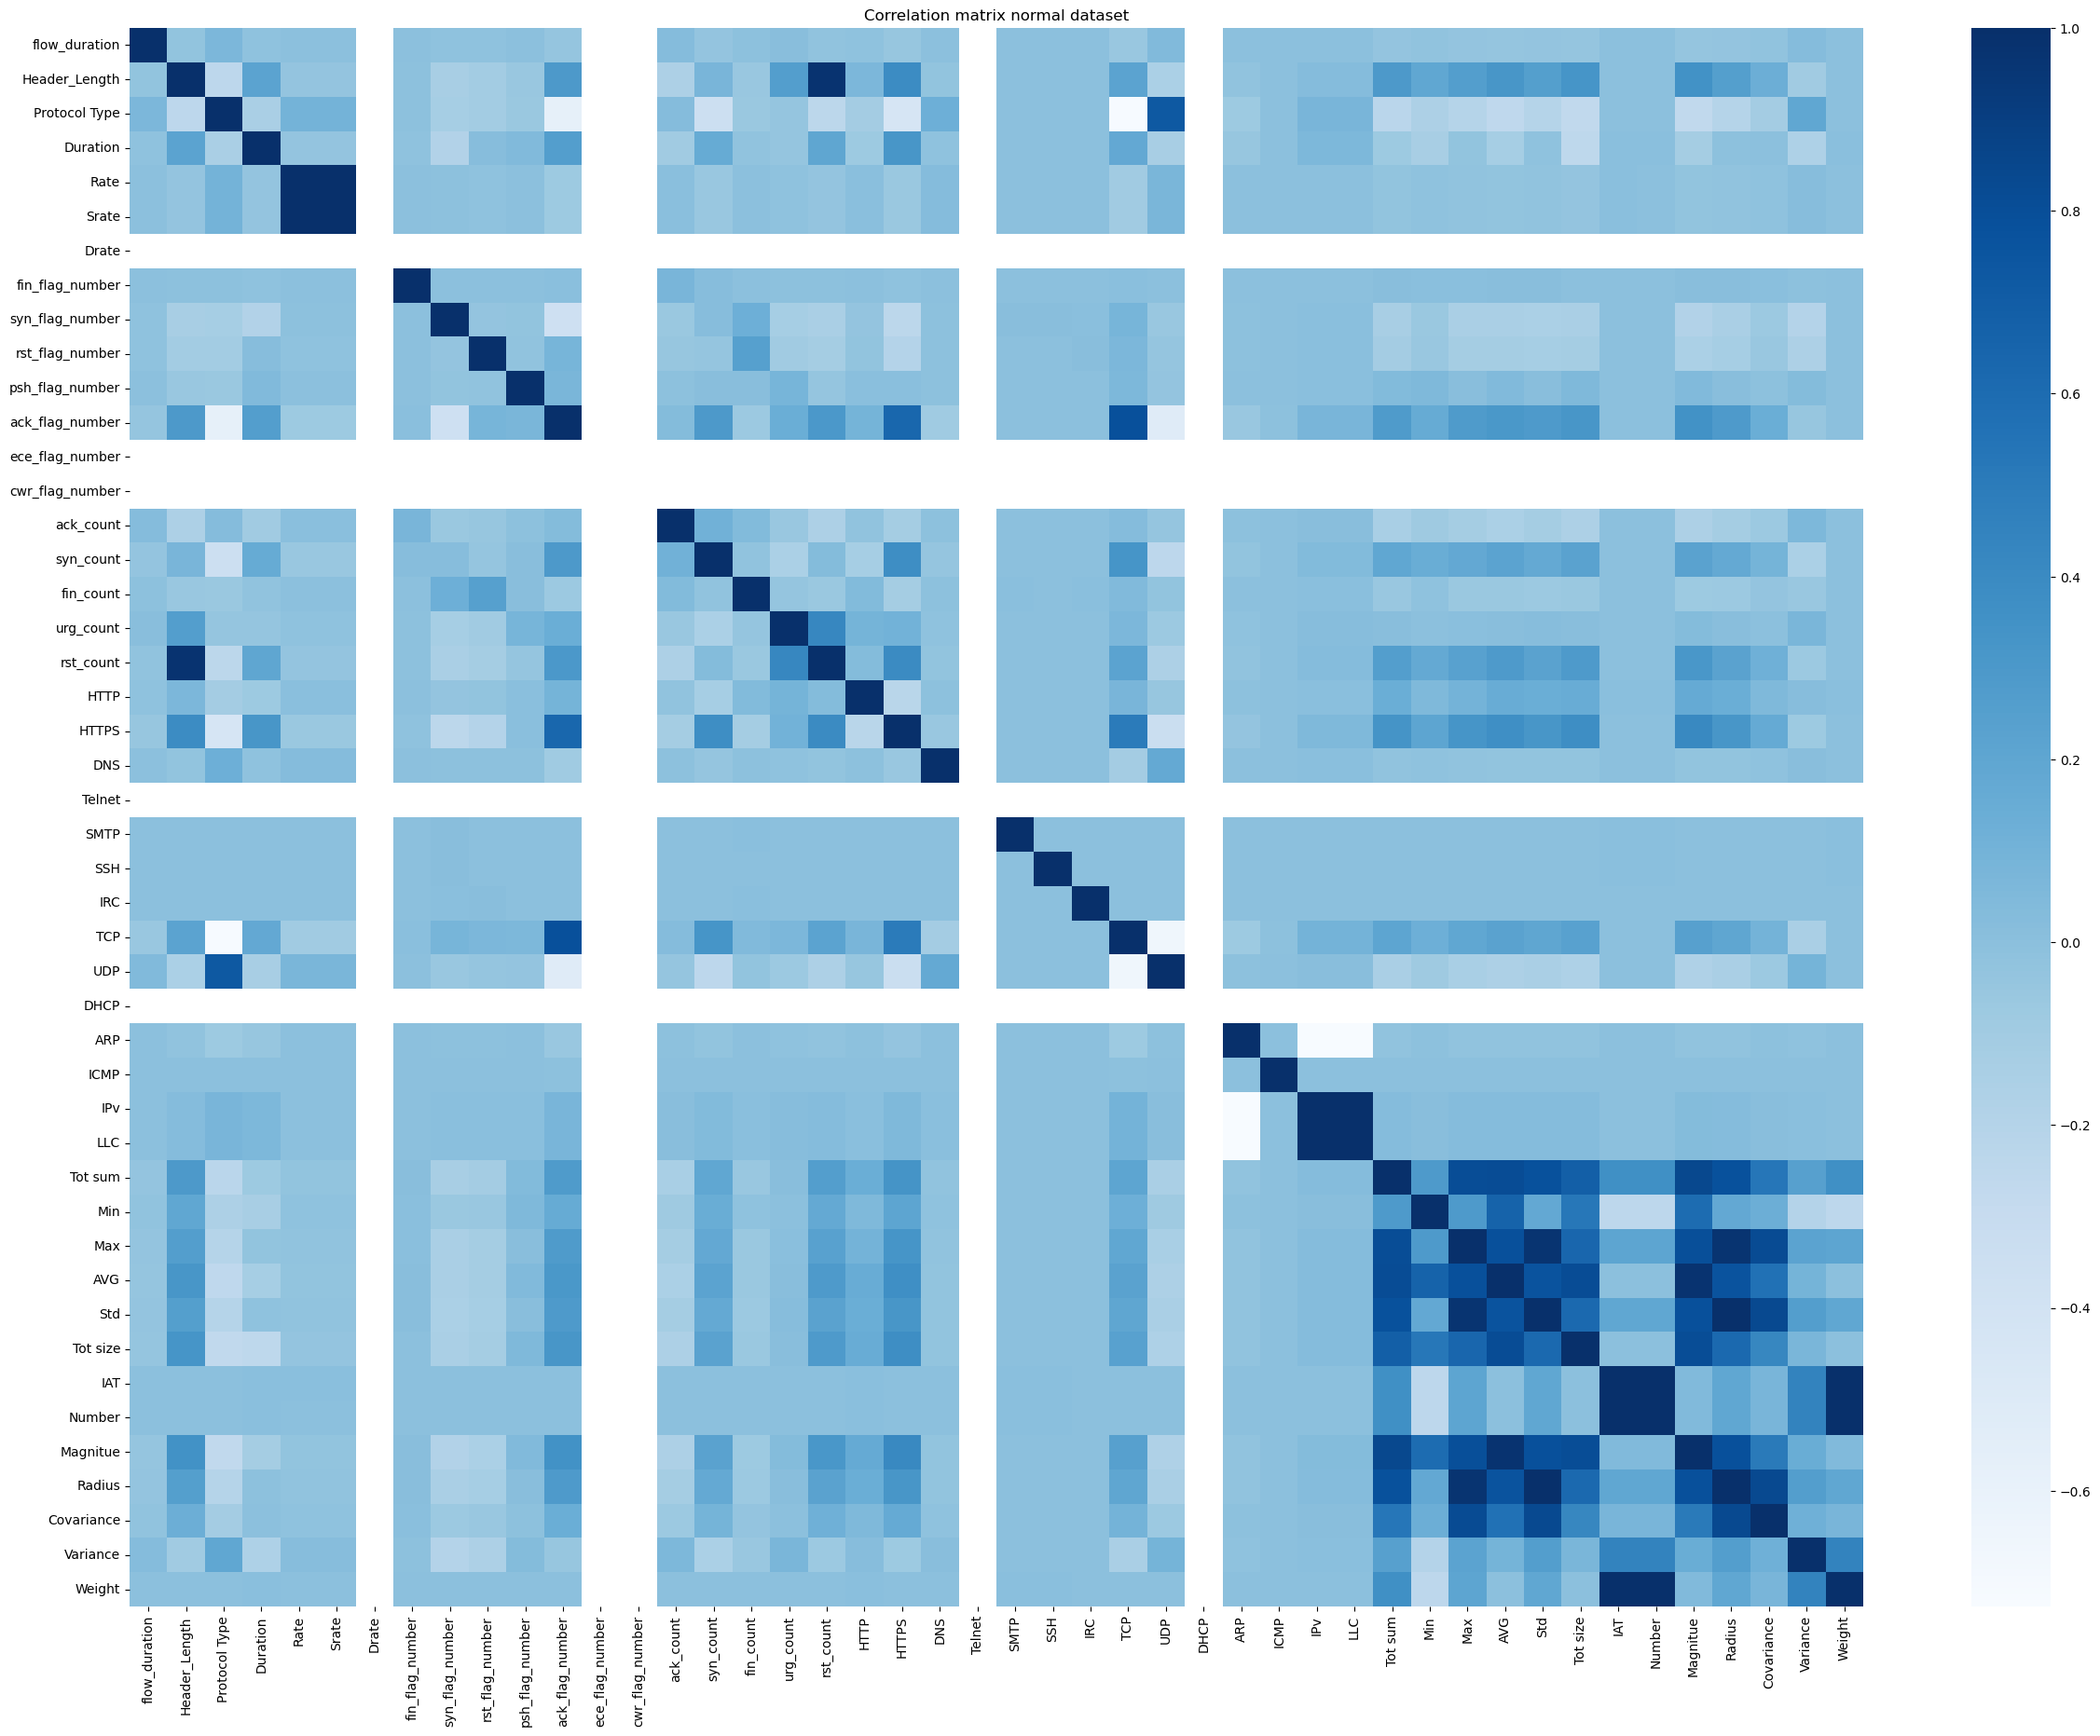

['dataset.csv', 'dataset0.csv', 'dataset1.csv', 'dataset2.csv', 'dataset3.csv']
49


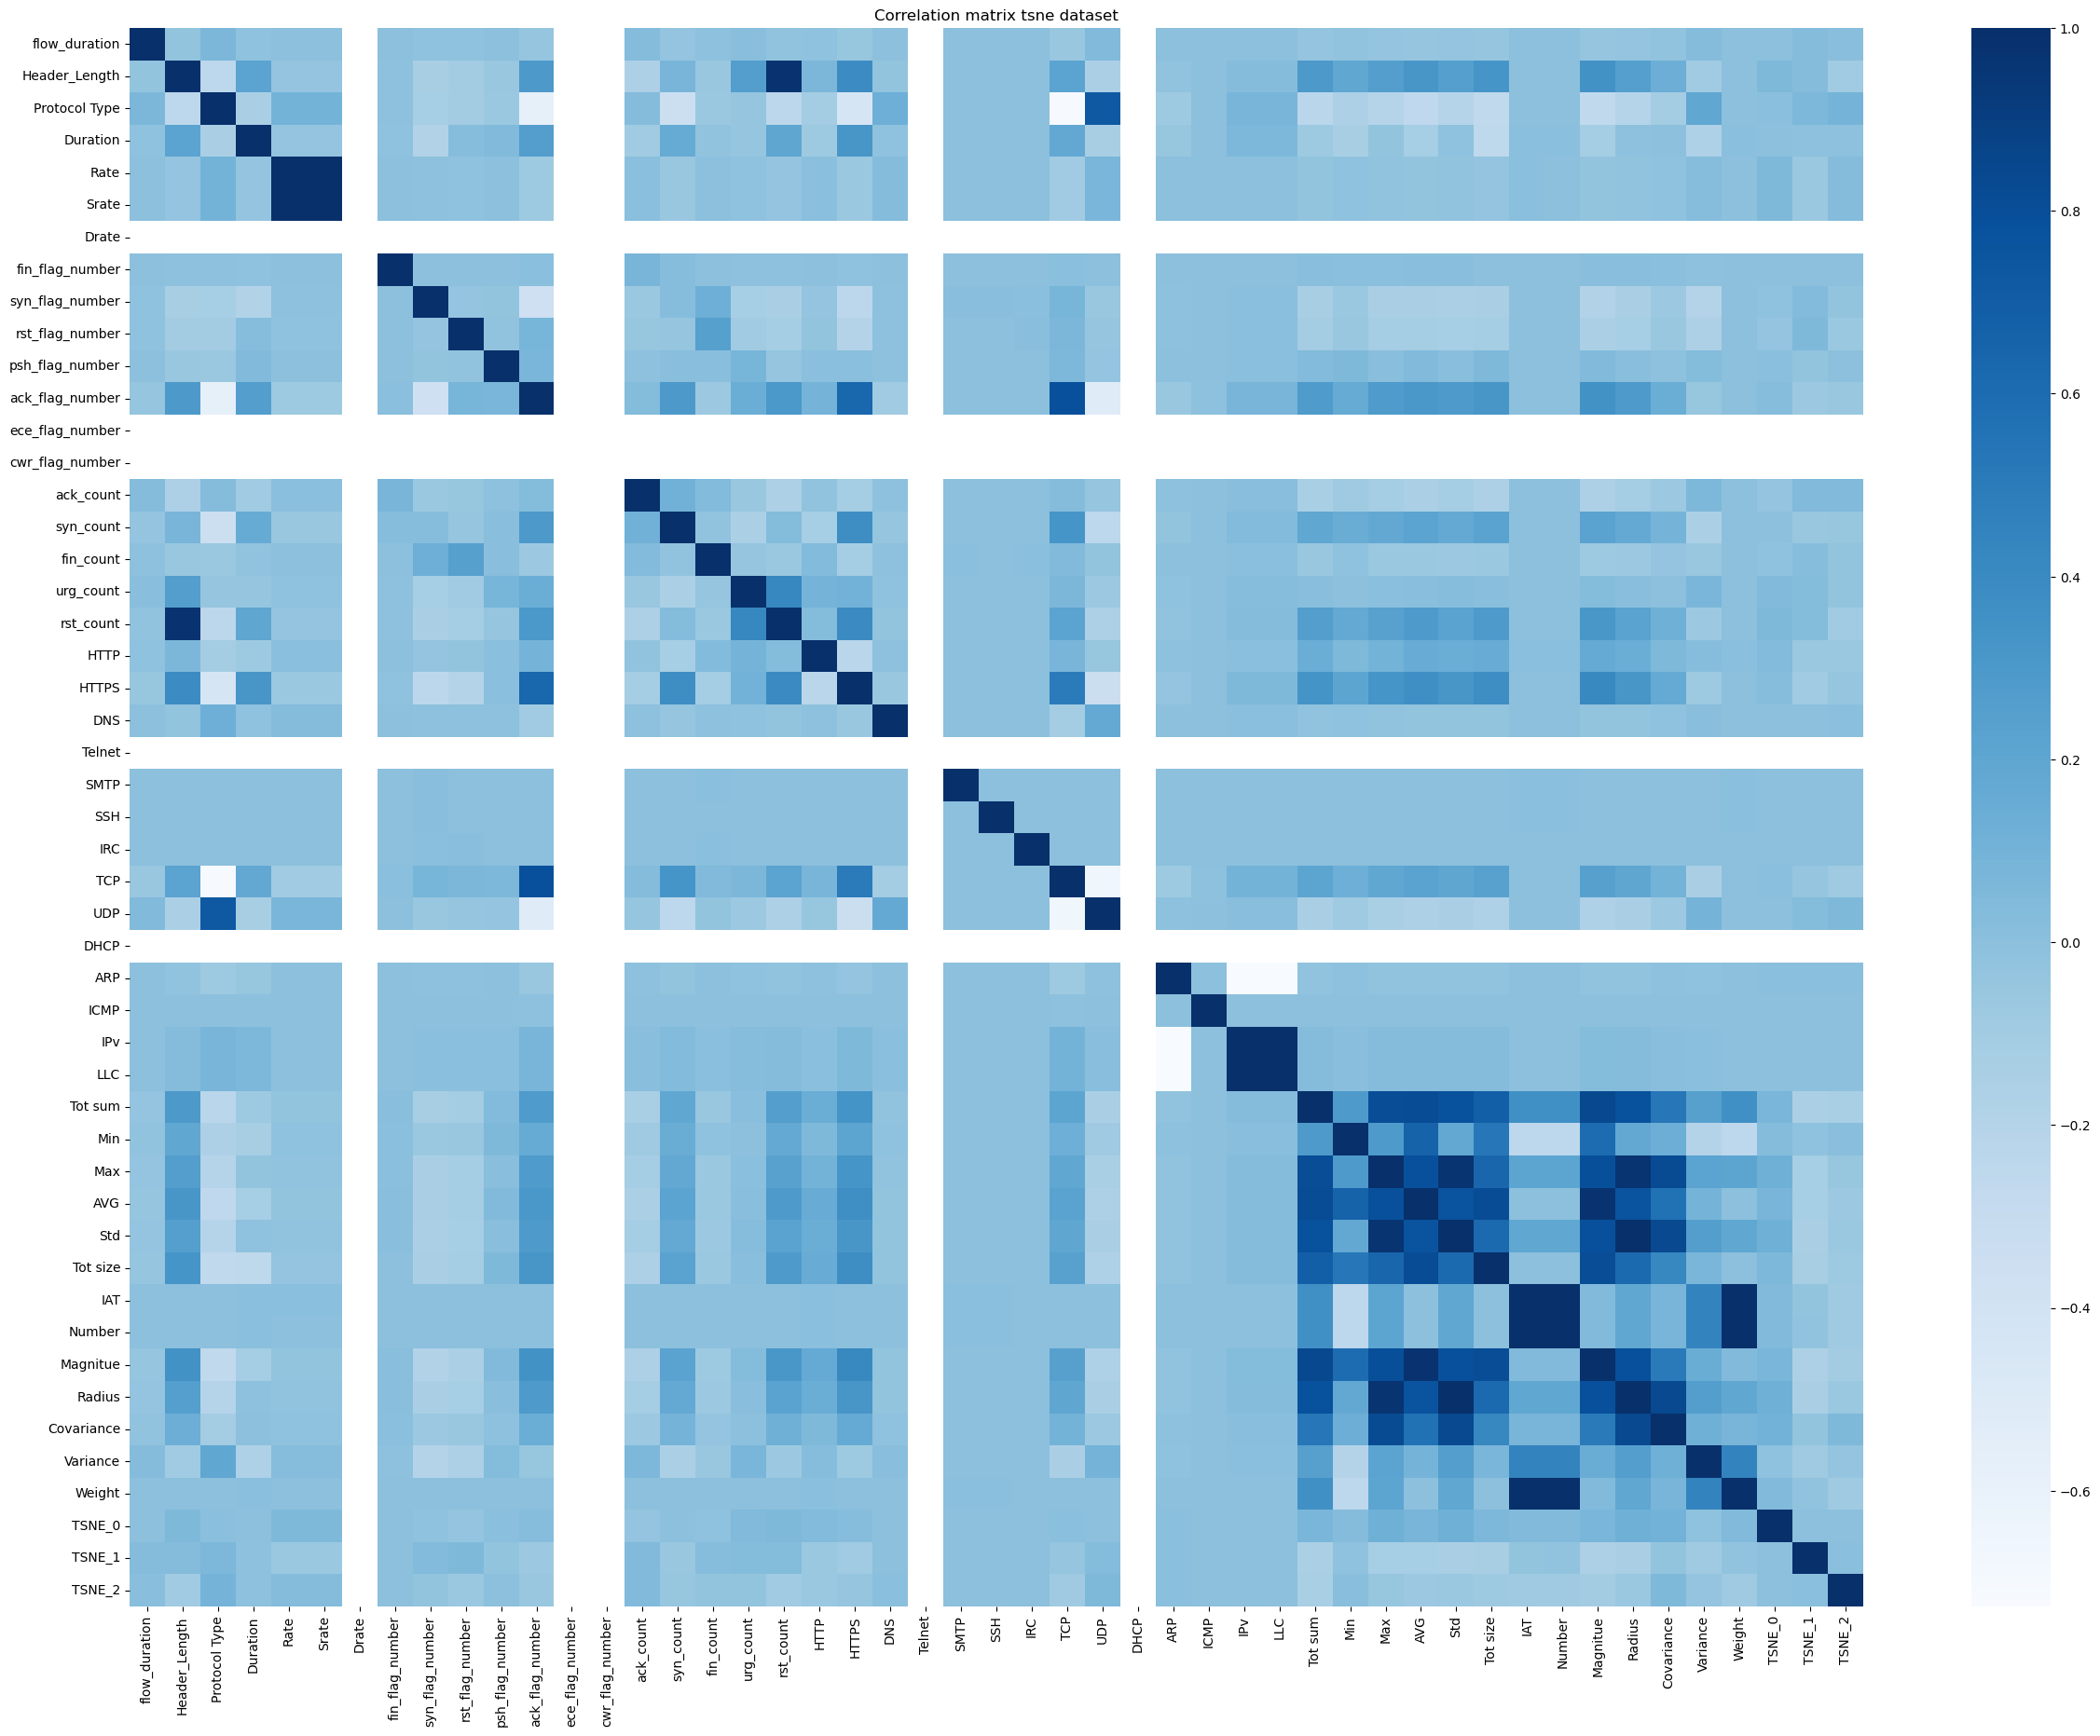

In [12]:
temp_datasets = get_all_datasets_and_sort(path_to_datasets=file_path)
print(temp_datasets)
df = pd.read_csv(file_path + temp_datasets[0])

# Correlation matrix normal dataset
corr_matrix = df[X_columns].corr()
print(corr_matrix)
plt.figure(figsize=(30, 22))
plt.title("Correlation matrix normal dataset")
sns.heatmap(corr_matrix, annot=False, fmt='.2f', cmap='Blues', annot_kws={"size": 16})
plt.show()

temp_datasets = get_all_datasets_and_sort(path_to_datasets=file_path + "TSNE\\")
print(temp_datasets)
df = pd.read_csv(file_path + "TSNE\\" + temp_datasets[0])


tsne_X_columns = X_columns.copy()
tsne_X_columns.extend(['TSNE_'+str(k) for k in range(0, 3)])
print(len(tsne_X_columns))

# Correlation matrix tsne dataset
corr_matrix = df[tsne_X_columns].corr()
plt.figure(figsize=(30, 22))
plt.title("Correlation matrix tsne dataset")
sns.heatmap(corr_matrix, annot=False, fmt='.2f', cmap='Blues', annot_kws={"size": 16})
plt.show()

##### Features importance TSNE

In [12]:
modelFeatures = [
    {
        "Name": "DT",
        "Model": joblib.load(model_path_all_classes + 'TSNE_model_TSNE_DT.joblib')
    },
]

100%|██████████| 1/1 [00:00<00:00, 2017.46it/s]


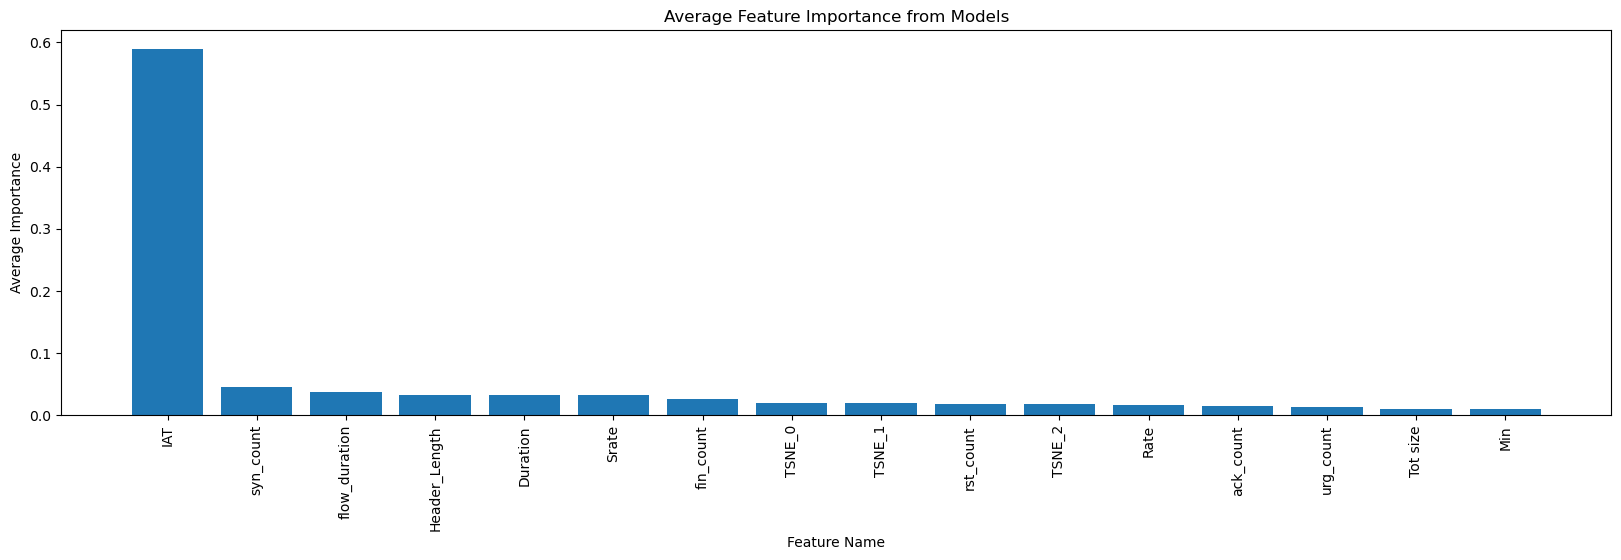

Feature  Average Importance
39            IAT            0.590082
15      syn_count            0.045238
0   flow_duration            0.037425
1   Header_Length            0.032846
3        Duration            0.032102
5           Srate            0.031910
16      fin_count            0.026722
46         TSNE_0            0.020319
47         TSNE_1            0.020038
18      rst_count            0.018510
48         TSNE_2            0.018339
4            Rate            0.015701
14      ack_count            0.014344
17      urg_count            0.013372
38       Tot size            0.010698
34            Min            0.010260

In [13]:
average_importance_df = calculate_and_plot_feature_importance(modelFeatures, train_sets, X_columns, z_column, X_columns, file_path, fitted_models=True, filter_bool=False, scaler=scaler, encoder=encoder)
average_importance_df.head(average_importance_df.size)

#### Add Smote

In [10]:
temp_datasets = get_all_datasets_and_sort(path_to_datasets=file_path)
# print(temp_datasets)

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42, k_neighbors=2)

for set in tqdm(temp_datasets):
        print(set)
        # Read df
        d = pd.read_csv(file_path + set)

        # Modify df
        X = d[X_columns]
        y = d[y_column]
        z = d[z_column]

        X, y = smote.fit_resample(X, y)

        d = X
        d[y_column] = y
        d[z_column] = z

        # Save and Delete
        d.to_csv(file_path + "SMOTE\\" + set, index=False)        
        del d

  0%|          | 0/5 [00:00<?, ?it/s]

dataset.csv


 20%|██        | 1/5 [00:28<01:55, 28.94s/it]

dataset0.csv


 40%|████      | 2/5 [01:06<01:41, 33.77s/it]

dataset1.csv


 60%|██████    | 3/5 [01:42<01:09, 34.83s/it]

dataset2.csv


 80%|████████  | 4/5 [02:19<00:35, 35.62s/it]

dataset3.csv


100%|██████████| 5/5 [02:55<00:00, 35.08s/it]


#### Select features by importance

['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number', 'rst_flag_number', 'psh_flag_number', 'ack_flag_number', 'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count', 'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC', 'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight']
['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number', 'rst_flag_number', 'psh_flag_number', 'ack_flag_number', 'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count', 'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC', 'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue', 'Rad

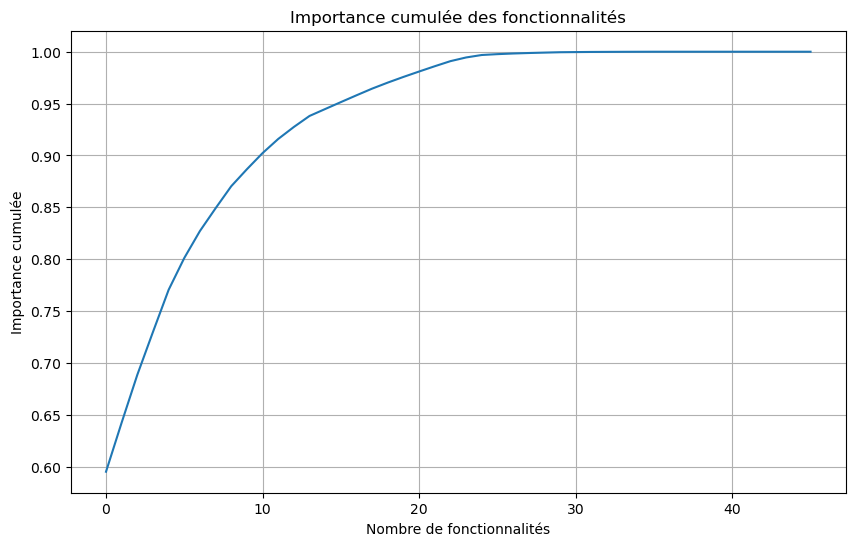

['IAT', 'flow_duration', 'syn_count', 'Duration', 'Header_Length', 'Srate', 'fin_count', 'rst_count', 'Rate', 'urg_count', 'ack_count', 'Tot size', 'Min', 'Protocol Type', 'Magnitue']


100%|██████████| 3/3 [00:02<00:00,  1.19it/s]


In [13]:
from sklearn.feature_selection import SelectFromModel
import numpy as np

def select_features_by_importance(X, model, threshold_percentage=0.95):
    """
    Sélectionne les caractéristiques en fonction de l'importance des fonctionnalités d'un modèle.

    Parameters:
    - X: Les données d'entraînement (numpy array ou dataframe).
    - model: Le modèle entraîné qui fournit l'importance des fonctionnalités.
    - threshold_percentage: Le pourcentage cumulatif d'importance à conserver (par défaut, 0.95).

    Returns:
    - X_selected: Les données avec les caractéristiques sélectionnées.
    """

    # Obtient l'importance des fonctionnalités à partir du modèle
    print(X)
    feature_importances = model.feature_importances_

    # Trie les indices des fonctionnalités par ordre décroissant d'importance
    sorted_feature_indices = np.argsort(feature_importances)[::-1] # argsort renvoie les indices qui trieraient le tableau et [::-1] inverse l'ordre

    # Calcule l'importance cumulée
    cumulative_importance = np.cumsum(feature_importances[sorted_feature_indices]) # cumsum calcule la somme cumulée et [sorted_feature_indices] réordonne les valeurs dans le même ordre que les indices

    # Plot l'importance cumulée
    plt.figure(figsize=(10, 6))
    plt.plot(cumulative_importance)
    plt.title('Importance cumulée des fonctionnalités')
    plt.xlabel('Nombre de fonctionnalités')
    plt.ylabel('Importance cumulée')
    plt.grid()
    plt.show()

    # Sélectionne les indices des fonctionnalités à conserver
    selected_feature_indices = sorted_feature_indices[cumulative_importance <= threshold_percentage]

    # Sélectionne les colonnes correspondantes dans X
    X_selected = [X[i] for i in selected_feature_indices.tolist()]

    return X_selected

print(X_columns)
selected_X = select_features_by_importance(X_columns, joblib.load(model_path_all_classes + 'model_DT.joblib'), threshold_percentage=0.95)
print(selected_X)

# Define and fit scaler
sf_scaler = MinMaxScaler()
for train_set in tqdm(train_sets):
    sf_scaler.fit(read_csv_file(train_set, file_path)[selected_X])

#### Building model

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:00<00:00, 113.51it/s]


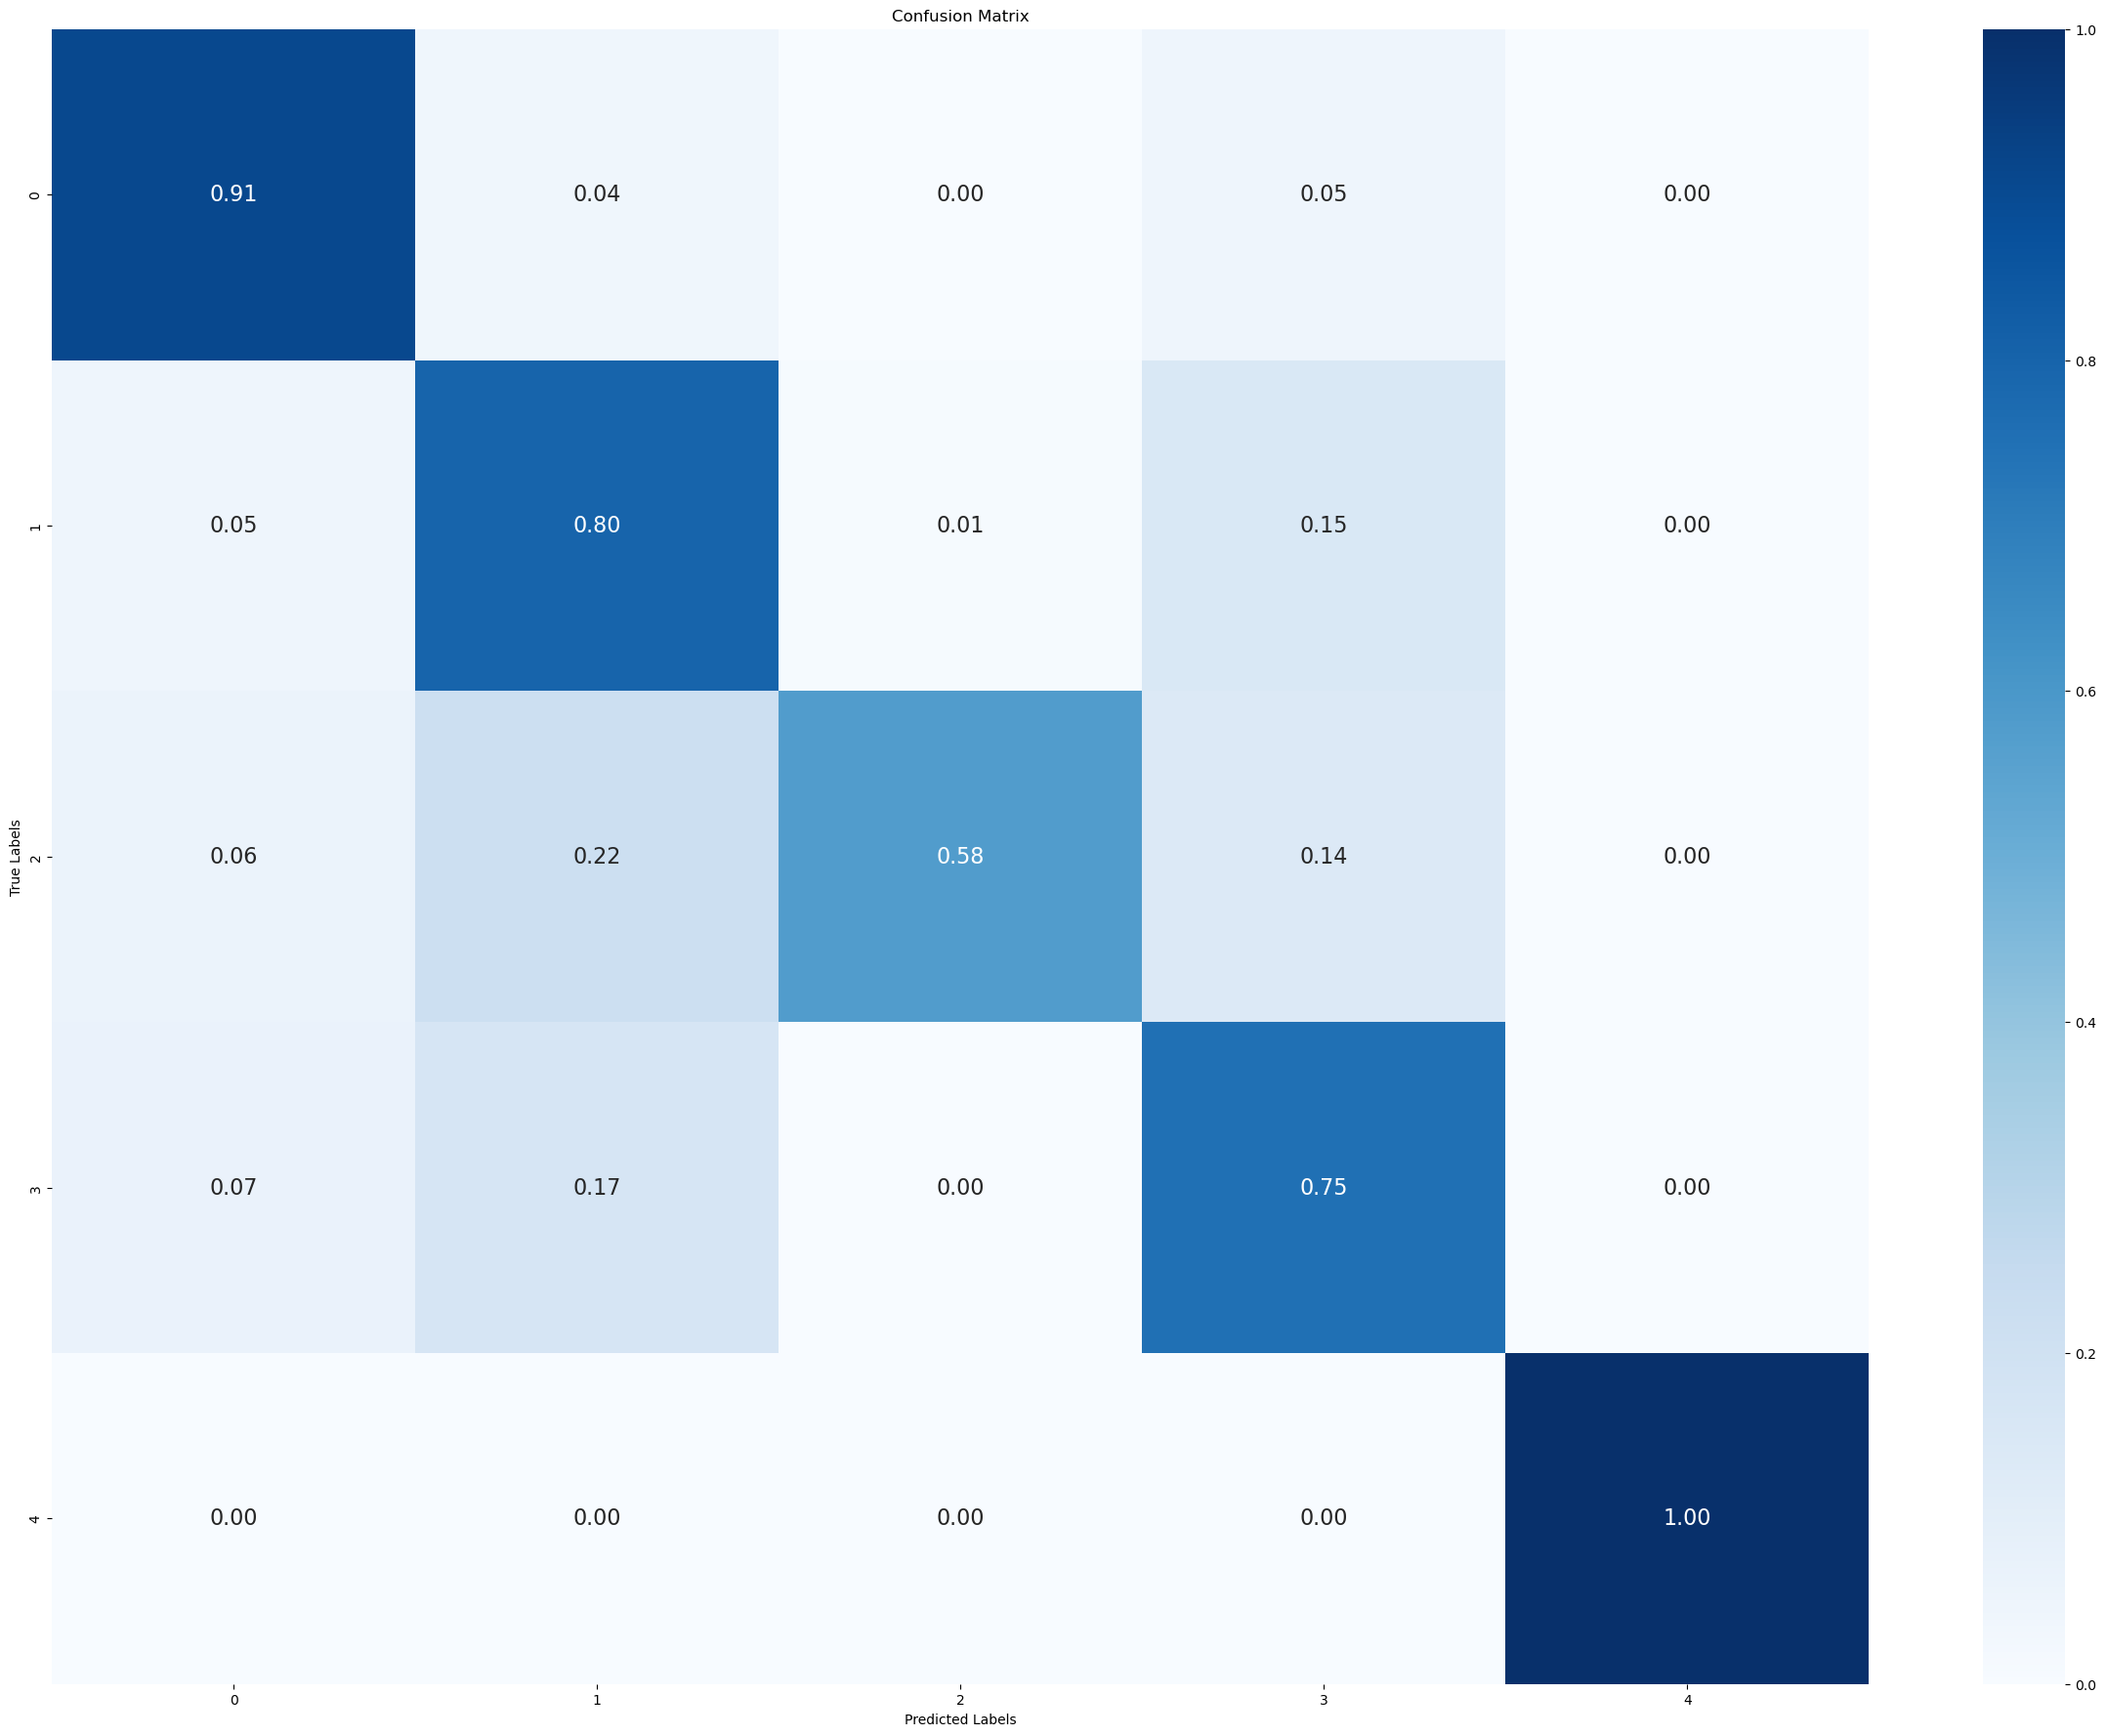

100%|██████████| 1/1 [00:06<00:00,  6.05s/it]


['.\\Recon_model\\All_classes\\encoder.joblib']

In [36]:
# Import or define encoder and performance dataframe
encoder = get_or_define_encoder(model_path_all_classes)
performance = get_or_define_performance_df(model_path_all_classes, performance_path)

# Buidling models
for model in tqdm(simpleModelsDef):
    # Build model
    performance, encoder = build_model_multifiltered(model['Model'], 'SF_' + model['Name'], train_sets, test_sets, file_path, performance, model_path_all_classes + 'SF_', X_columns=selected_X , y_column=y_column, filter_cols=filter_cols, filter_bool=True, filter_name=filter_name, scaler=sf_scaler, encoder=encoder, confusionMatrix=True)

    # Save performance
    performance.to_csv(model_path_all_classes + performance_path, index=False)

# Save the encoder to a file
joblib.dump(encoder, model_path_all_classes+'encoder.joblib')

#### Complex models

In [10]:
complexModelsDitionnary = [
    {
        "Name": "Voting (Cat, XGB, LIGHT)",
        "Model": VotingClassifier([
            ('Cat', CatBoostClassifier(random_state = 42, verbose = 0)),
            ('XGB', XGBClassifier(random_state = 42)),
            ('LIGHT', LGBMClassifier(random_state = 42, verbose = 0)),
            ],
            voting='soft')
    },
    {
        "Name": "Bagging (XGB)",
        "Model": BaggingClassifier(base_estimator=XGBClassifier(random_state = 42), n_estimators=15)
    },
    {
        "Name": "Stacking (Cat, LIGHT, XGB)",
        "Model": StackingClassifier([
            ('Cat', CatBoostClassifier(random_state = 42, verbose = 0)),
            ('LIGHT', LGBMClassifier(random_state = 42, verbose = 0)),
            ],
            final_estimator=XGBClassifier(random_state = 42),
            cv=5)
    },
]

In [11]:
# Import or define encoder and performance dataframe
encoder = get_or_define_encoder(model_path_all_classes)
performance = get_or_define_performance_df(model_path_all_classes, performance_path)

# Buidling models
for model in tqdm(complexModelsDitionnary):
    # Build model
    performance, encoder = build_model_multifiltered(model['Model'], model['Name'], train_sets, test_sets, file_path, performance, model_path_all_classes + "complex_", X_columns=X_columns , y_column=y_column, filter_cols=filter_cols, filter_bool=True, filter_name=filter_name, scaler=scaler, encoder=encoder)

    # Save performance
    performance.to_csv(model_path_all_classes + performance_path, index=False)

# Save the encoder to a file
joblib.dump(encoder, model_path_all_classes+'encoder.joblib')

  0%|          | 0/3 [00:00<?, ?it/s]

 67%|██████▋   | 2/3 [10:23<05:44, 344.24s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


100%|██████████| 3/3 [15:58<00:00, 319.65s/it]


['.\\Recon_model\\All_classes\\encoder.joblib']

#### Feature Importance

.\Recon_model\All_classes\model_DT.joblib
.\Recon_model\All_classes\model_RF.joblib
.\Recon_model\All_classes\model_ET.joblib
.\Recon_model\All_classes\model_XGB.joblib
.\Recon_model\All_classes\model_Cat.joblib
.\Recon_model\All_classes\model_LIGHT.joblib
.\Recon_model\All_classes\model_GBoost.joblib
.\Recon_model\All_classes\model_Adaboost.joblib


100%|██████████| 8/8 [00:00<00:00, 58.56it/s]


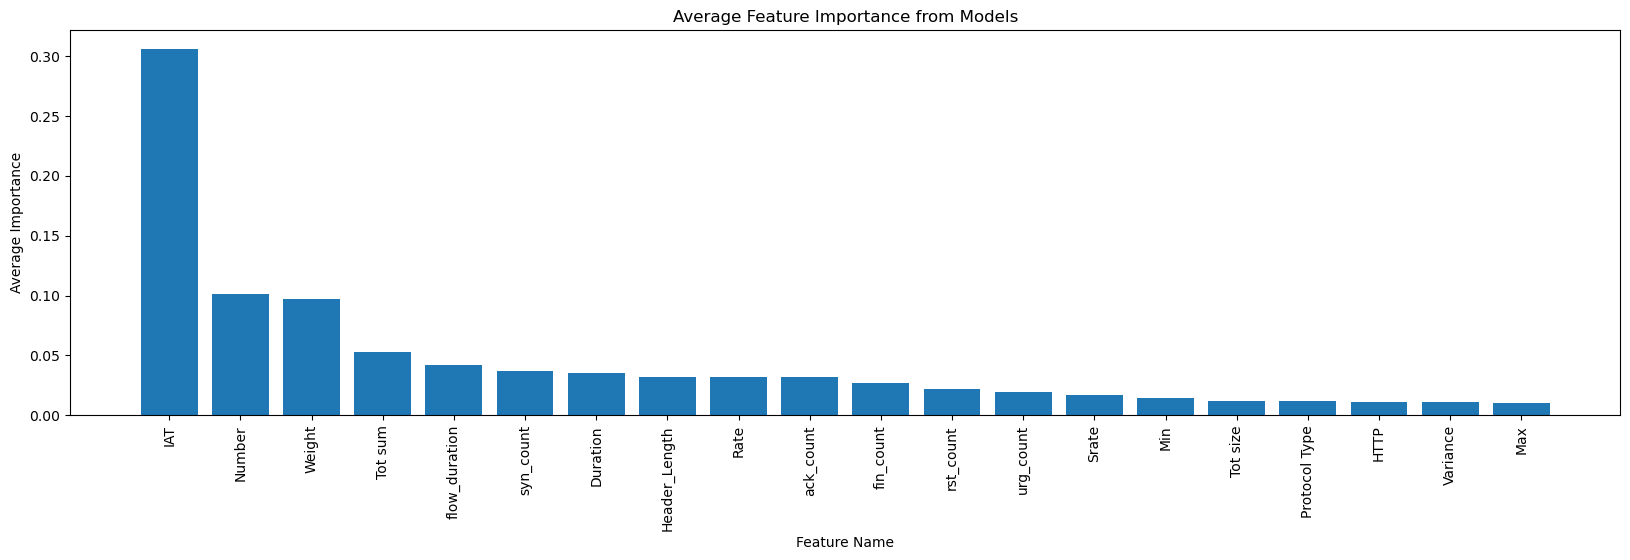

Feature  Average Importance
39            IAT            0.306289
40         Number            0.101093
45         Weight            0.097133
33        Tot sum            0.053156
0   flow_duration            0.042216
15      syn_count            0.037139
3        Duration            0.035369
1   Header_Length            0.032205
4            Rate            0.032169
14      ack_count            0.031740
16      fin_count            0.026781
18      rst_count            0.021632
17      urg_count            0.019484
5           Srate            0.017098
34            Min            0.014213
38       Tot size            0.012285
2   Protocol Type            0.012256
19           HTTP            0.011391
44       Variance            0.011313
35            Max            0.010271

In [41]:
# Import encoder and get all features
encoder = get_encoder(model_path_all_classes, "Please, build models first")

simpleModelsDef = model_dict_refactor_with_load_model(simpleModelsDef, model_path_all_classes)

# Get feature importance
average_importance_df = calculate_and_plot_feature_importance(simpleModelsDef, train_sets, X_columns, z_column, X_columns, file_path, fitted_models=True, filter_bool=False, scaler=scaler, encoder=encoder)
# average_importance_df.to_csv('.\\resultats\\Recon\\All_classes\\feature_importance.csv', index=False)
average_importance_df.head(average_importance_df.size)

### Display performance

In [26]:
# Preprocessing if necessary
performance = read_csv_file(performance_path, model_path_all_classes)
performance = performance.drop(14).reset_index(drop=True)
# performance.insert(0, 'Model', [d['Name'] for d in simpleModelsDef])

performance.head()
# performance.to_csv(model_path_all_classes + performance_path, index=False)

In [27]:
read_csv_file(performance_path, model_path_all_classes).sort_values(by=['Total rows', 'Accuracy Testing', 'Recall Testing', 'Precision Testing', 'F1 Testing'], ascending=False).head(20)

Model  Accuracy Training  Recall Training  \
10               Bagging (XGB)           0.931769         0.927895   
9     Voting (Cat, XGB, LIGHT)           0.927547         0.933455   
3                          XGB           0.934831         0.939892   
5                        LIGHT           0.920457         0.938931   
11  Stacking (Cat, LIGHT, XGB)           0.918469         0.890004   
4                          Cat           0.918952         0.870929   
1                           RF           0.992818         0.993519   
6                       GBoost           0.870552         0.838357   
14                       SF_DT           0.996653         0.996271   
0                           DT           0.995183         0.995172   
13                    SMOTE_DT           0.995183         0.995172   
2                           ET           0.997790         0.997405   
12                     TSNE_DT           0.999976         0.999831   
8                          MLP           0.751677         0.628650   
7                     Adaboost           0.691761         0.644241   

    Precision Training  F1 Training  Accuracy Testing  Recall Testing  \
10            0.949640     0.938172          0.896071        0.837126   
9             0.946652     0.939826          0.895703        0.836122   
3             0.951827     0.945679          0.894860        0.838811   
5             0.941061     0.939947          0.892575        0.824752   
11            0.932547     0.908718          0.891990        0.829523   
4             0.938070     0.897736          0.891990        0.828626   
1             0.994348     0.993932          0.880946        0.745639   
6             0.899661     0.863430          0.863848        0.814008   
14            0.997505     0.996884          0.851294        0.809388   
0             0.996322     0.995744          0.850723        0.808858   
13            0.996322     0.995744          0.850723        0.808858   
2             0.998282     0.997842          0.845650        0.718191   
12            0.999987     0.999909          0.839855        0.801096   
8             0.734086     0.638228          0.739068        0.612411   
7             0.795190     0.680822          0.654752        0.640000   

    Precision Testing  F1 Testing   FU_rate   FL_rate    FU     FL  Total rows  
10           0.914259    0.865922  0.046245  0.057684  3400   4241       73521  
9            0.912592    0.864660  0.046653  0.057643  3430   4238       73521  
3            0.907238    0.865206  0.047877  0.057263  3520   4210       73521  
5            0.885233    0.848124  0.048830  0.058596  3590   4308       73521  
11           0.896948    0.855205  0.049278  0.058732  3623   4318       73521  
4            0.906974    0.857358  0.048122  0.059888  3538   4403       73521  
1            0.895455    0.768296  0.045701  0.073353  3360   5393       73521  
6            0.875276    0.838325  0.058772  0.077379  4321   5689       73521  
14           0.804117    0.806683  0.076278  0.072428  5608   5325       73521  
0            0.794835    0.801374  0.076332  0.072945  5612   5363       73521  
13           0.794835    0.801374  0.076332  0.072945  5612   5363       73521  
2            0.859172    0.741265  0.052393  0.101957  3852   7496       73521  
12           0.787532    0.793873  0.082493  0.077651  6065   5709       73521  
8            0.668986    0.616406  0.112485  0.148447  8270  10914       73521  
7            0.763038    0.660477  0.105888  0.239360  7785  17598       73521

## Final Prediction

In [11]:
# Define model and import encoder
model = joblib.load(model_path_all_classes + 'model_XGB.joblib')
encoder = get_encoder(model_path_all_classes, "Please, build binary model(s) first")

# Get binary col to include it into the new df
pred_column = 'Prediction'
binary_col = get_col_in_csv(after_build_csv, model_repo, z_column, pred_column, filter_name, filter=True, verbose=True)

# Get prediction
new_after_build_set, y_test, y_pred, z_test = get_prediction_by_model_s(model, [after_build_csv], model_repo, X_columns, y_column=y_column, z_column=pred_column, filter_bool=True, filter_name=filter_name, scale=True, encode=False, scaler=scaler, encoder=encoder)

# Build new dataframe and save it
new_after_build_set[y_column] = y_test
new_after_build_set['Final Prediction'] = encoder.inverse_transform(y_pred)
new_after_build_set[z_column] = binary_col
new_after_build_set['Prediction'] = z_test
count = len(new_after_build_set[new_after_build_set[y_column] != new_after_build_set['Final Prediction']])
y_pred = encoder.inverse_transform(y_pred)

# Get performance
res = pd.DataFrame([[accuracy_score(y_test, y_pred), recall_score(y_test, y_pred, average='weighted'), precision_score(y_test, y_pred, average='weighted'), f1_score(y_test, y_pred, average='weighted'), count, count / len(new_after_build_set),len(new_after_build_set)]], columns=['Accuracy', 'Recall', 'Precision', 'F1', 'Mispredicted count', 'Mispredicted rate', 'Total rows']).head()

res.head()

Dataframe length: 302491.
After reduction dataframe length: 68920.


100%|██████████| 1/1 [00:00<00:00,  1.05it/s]


Accuracy   Recall  Precision        F1  Mispredicted count  \
0   0.88372  0.88372   0.847486  0.864784                8014   

   Mispredicted rate  Total rows  
0            0.11628       68920

In [12]:
labelBenignTraffic = new_after_build_set[
    (new_after_build_set['label'] == 'BenignTraffic') &
    (new_after_build_set['Final Prediction'] != 'BenignTraffic')
]
FinalBenighTraffic = new_after_build_set[
    (new_after_build_set['label'] != 'BenignTraffic') &
    (new_after_build_set['Final Prediction'] == 'BenignTraffic')
]
GoodBenignTraffic = new_after_build_set[
    (new_after_build_set['label'] == 'BenignTraffic') &
    (new_after_build_set['Final Prediction'] == 'BenignTraffic')
]

del new_after_build_set

In [13]:
print(len(labelBenignTraffic), len(FinalBenighTraffic), len(GoodBenignTraffic))

2896 0 0
